In this Project I have created a Docs file form using the information copied from the website "https://gameofthrones.fandom.com/wiki/Game_of_Thrones" under the section Cast. With is docs I have created a CSV file which contains columns as Actor, Character, Family and Description.

With the usage of generated game_of_thrones_characters.csv file I have tried to develop a network representation.

Selenium can do webscrapping process but it is a browser automation libraries. 
It is useful for scrapping dynamic webpage that uses Javascript for content.

Scrapy a webscrapping network, it a gothrough entire wedsites in systematic way

BeautifulSoup is a parsing library, it only does parsing to save the output. Inorder to pull the data we required to request other libraries. It can automatically detect the structures like HTML, XML, etc.,

re Regular Expression is used for parsing, sreaching and extracting information from the text file.

In [158]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [159]:
!pip install webdriver_manager

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [160]:
!pip install requests beautifulsoup4


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [161]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
!pip install python-docx

from docx import Document

import re

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [162]:

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_characters"

# Send a request to fetch the content of the page
response = requests.get(url)

# Parse the page content
soup = BeautifulSoup(response.content, 'html.parser')

characters = []

for table in soup.find_all('table', class_='wikitable'):
    for row in table.find_all('tr'):
        cells = row.find_all('td')
        if len(cells) > 0:
            character_name = cells[0].get_text(strip=True)  # Adjust index based on the correct cell
            characters.append(character_name)

# Print the characters
for character in characters:
    print(character)


Sean Bean
Mark Addy
Nikolaj Coster-Waldau
Michelle Fairley
Lena Headey
Emilia Clarke
Iain Glen
Harry Lloyd
Kit Harington
Richard Madden
Sophie Turner
Maisie Williams
Alfie Allen
Isaac Hempstead Wright
Jack Gleeson
Rory McCann
Peter Dinklage
Jason Momoa
Aidan Gillen
Liam Cunningham
John Bradley
Stephen Dillane
Carice van Houten
James Cosmo
Jerome Flynn
Conleth Hill
Sibel Kekilli
Natalie Dormer
Charles Dance
Oona Chaplin
Rose Leslie
Joe Dempsie
Kristofer Hivju
Gwendoline Christie
Iwan Rheon
Hannah Murray
Michiel Huisman
Nathalie Emmanuel
Dean-Charles Chapman
Indira Varma
Tom Wlaschiha
Michael McElhatton
Jonathan Pryce
Jacob Anderson
Donald Sumpter
Jamie Sives
Ron Donachie
Joseph Mawle
Dar Salim
Esmé Bianco
Susan Brown
Art Parkinson
Nell Tiger Free
Kristian Nairn
Roxanne McKee
Amrita Acharia
Wilko Johnson
Luke Barnes
Owen Teale
Ian McElhinney
Francis Magee
Julian Glover
Gethin Anthony
Peter Vaughan
Miltos Yerolemou
Mark Stanley
Josef Altin
Elyes Gabel
Eugene Simon
Dominic Carter
Emun Elli

In [164]:
!pip install requests beautifulsoup4 pandas networkx matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [165]:
!pip install google-api-python-client google-auth

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [166]:

# Path to your .docx file
doc_path = 'Game of Thrones.docx'

# Load the document
doc = Document(doc_path)

# Extract text
full_text = []
for para in doc.paragraphs:
    full_text.append(para.text)

# Combine text into a single string
document_text = '\n'.join(full_text)

# Print or process the extracted text
print(document_text)


Game of Thrones

House Stark

Main page: House Stark
Sean Bean as Lord Eddard Stark, Lord of Winterfell.
Michelle Fairley as Lady Catelyn Stark, originally of House Tully.
Richard Madden as Robb Stark, Eddard's eldest son and heir.
Sophie Turner as Sansa Stark, Eddard's eldest daughter.
Maisie Williams as Arya Stark, Eddard's youngest daughter.
Isaac Hempstead-Wright as Bran Stark, Eddard's middle son.
Art Parkinson as Rickon Stark, Eddard's youngest son.
Kit Harington as Jon Snow, Eddard's bastard son by an unknown mother.
Joseph Mawle as Benjen Stark, Eddard's younger brother, First Ranger of the Night's Watch.
Retainers at Winterfell

Alfie Allen as Theon Greyjoy, a ward and hostage for his rebellious father's good behavior.
Ron Donachie as Ser Rodrik Cassel, master of arms.
Jamie Sives as Jory Cassel, Rodrik's nephew, captain of the guards.
Donald Sumpter as Maester Luwin, a maester of the Citadel.
Kristian Nairn as Hodor, a simple stableboy.
Margaret John as Old Nan, a retired ser

In [167]:

# Function to read and extract text from a .docx file
def read_docx(doc_path):
    doc = Document(doc_path)
    # Extract text from all paragraphs and filter out any empty or non-informative paragraphs
    full_text = [para.text.strip() for para in doc.paragraphs if para.text.strip()]
    # Combine text into a single string, separating paragraphs with a newline
    return '\n'.join(full_text)

# Path to your .docx file
doc_path = 'Game of Thrones.docx'

# Extract text from the .docx file
document_text = read_docx(doc_path)

# Refine regex to capture specific format "Actor as Character, Description."
pattern = re.compile(r'([\w\s\.\(\)\/]+) as ([\w\s\-\'\.]+)(?:,\s*(.*))?\.?')

# Extract matches
matches = pattern.findall(document_text)

# Known families to check against
known_families = {
    "Stark", "Lannister", "Greyjoy", "Baratheon", 
    "Targaryen", "Bolton", "Arryn", "Tyrell", "Tully", "Frey", "Martell", "Mormont", "Clegane"
}

# Preparing a list for the structured data
extracted_data = []
for actor, character_full, description in matches:
    # Clean up actor for cases with season/actor change indicators
    actor = re.split(r'\s*\(.*\)', actor)[0].strip() 

    # full character information
    char_parts = character_full.split(', ')
    character = char_parts[0].strip()
    
    # If description is missing in parsing, try fetching the description from character info
    character_description = ", ".join(char_parts[1:]) if len(char_parts) > 1 else description
    character_description = character_description.strip() if character_description else "No description"
    
    # Infer family name from character name using known families
    family = next((name for name in known_families if name in character_full), "Unknown")

    # Append the structured record
    extracted_data.append({
        'Actor': actor,
        'Character': character,
        'Family': family,
        'Description': character_description
    })

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(extracted_data)

# Save the DataFrame to a CSV file
output_csv = 'game_of_thrones_characters.csv'
df.to_csv(output_csv, index=False)

print(f"CSV file created at {output_csv} with the following data:")
print(df.head())


CSV file created at game_of_thrones_characters.csv with the following data:
                    Actor           Character Family  \
0  House Stark\nSean Bean   Lord Eddard Stark  Stark   
1        Michelle Fairley  Lady Catelyn Stark  Stark   
2          Richard Madden          Robb Stark  Stark   
3           Sophie Turner         Sansa Stark  Stark   
4         Maisie Williams          Arya Stark  Stark   

                     Description  
0            Lord of Winterfell.  
1     originally of House Tully.  
2  Eddard's eldest son and heir.  
3      Eddard's eldest daughter.  
4    Eddard's youngest daughter.  


In [168]:
!pip install pandas networkx matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


KeyError: 'actor'

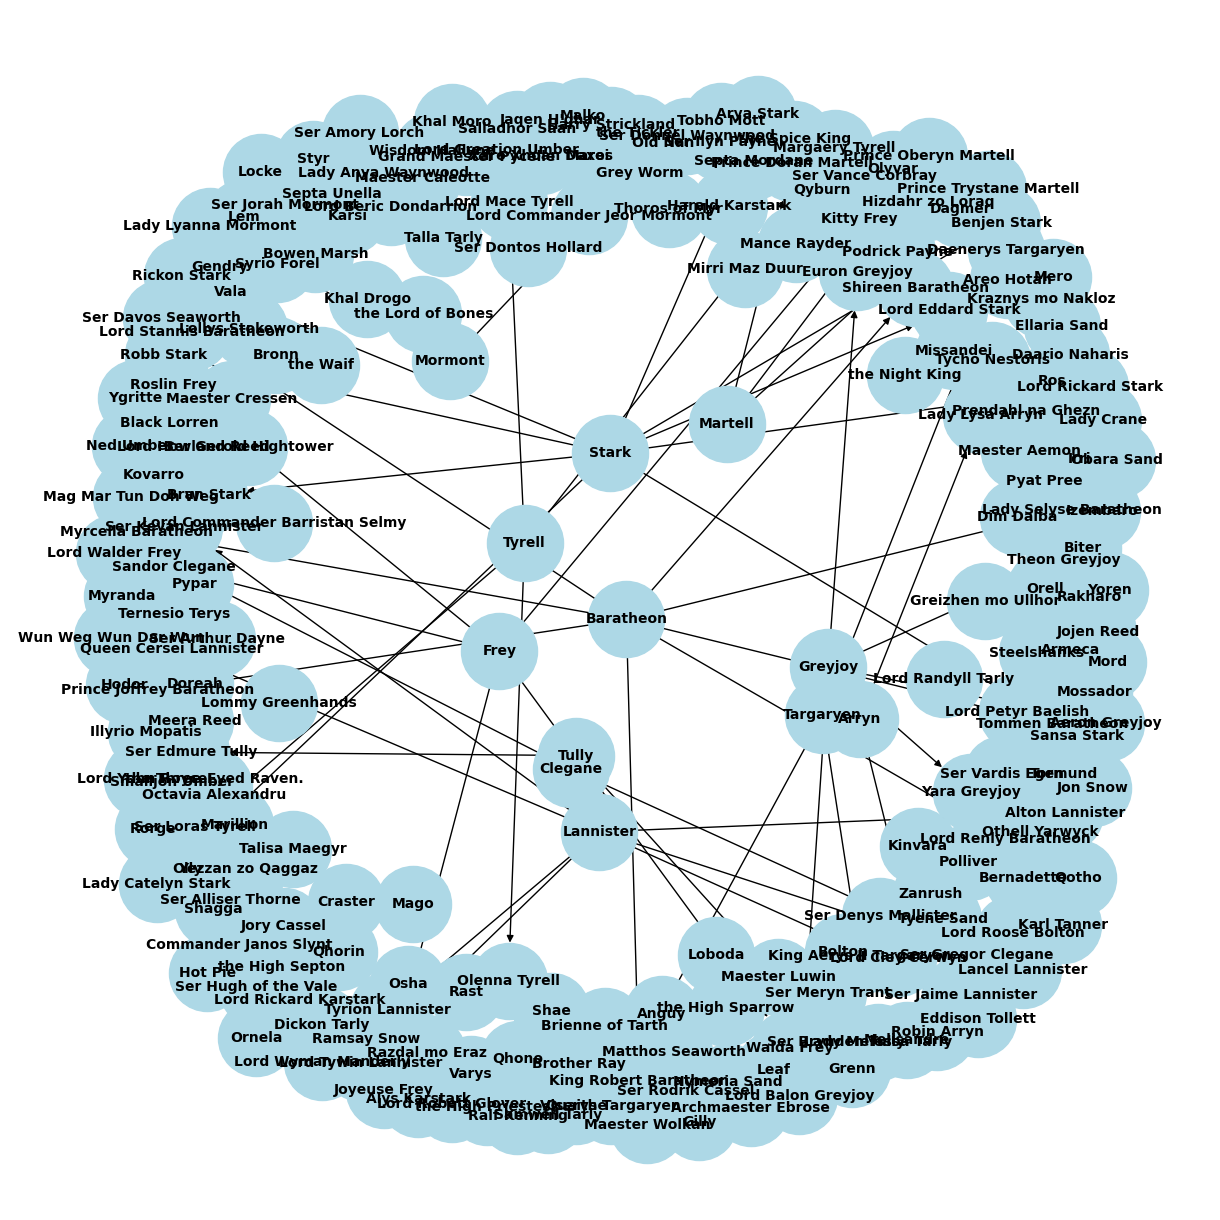

In [170]:


# Load the CSV file
csv_file = 'game_of_thrones_characters.csv'
df = pd.read_csv(csv_file)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, row in df.iterrows():
    actor = row['Actor']
    character = row['Character']
    family = row['Family']
    description = row['Description']

    # Add the character node
    G.add_node(character, actor=actor, family=family, description=description)
    
    # Add an edge to show that the character is part of a family
    if family != "Unknown":
        G.add_edge(family, character)

# Draw the network
pos = nx.spring_layout(G, k=0.15, iterations=20)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')

# Add labels
node_labels = {node: f"{node}\n{G.nodes[node]['actor']}" for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8)

# Display the graph
plt.title('Game of Thrones Character Network')
plt.show()


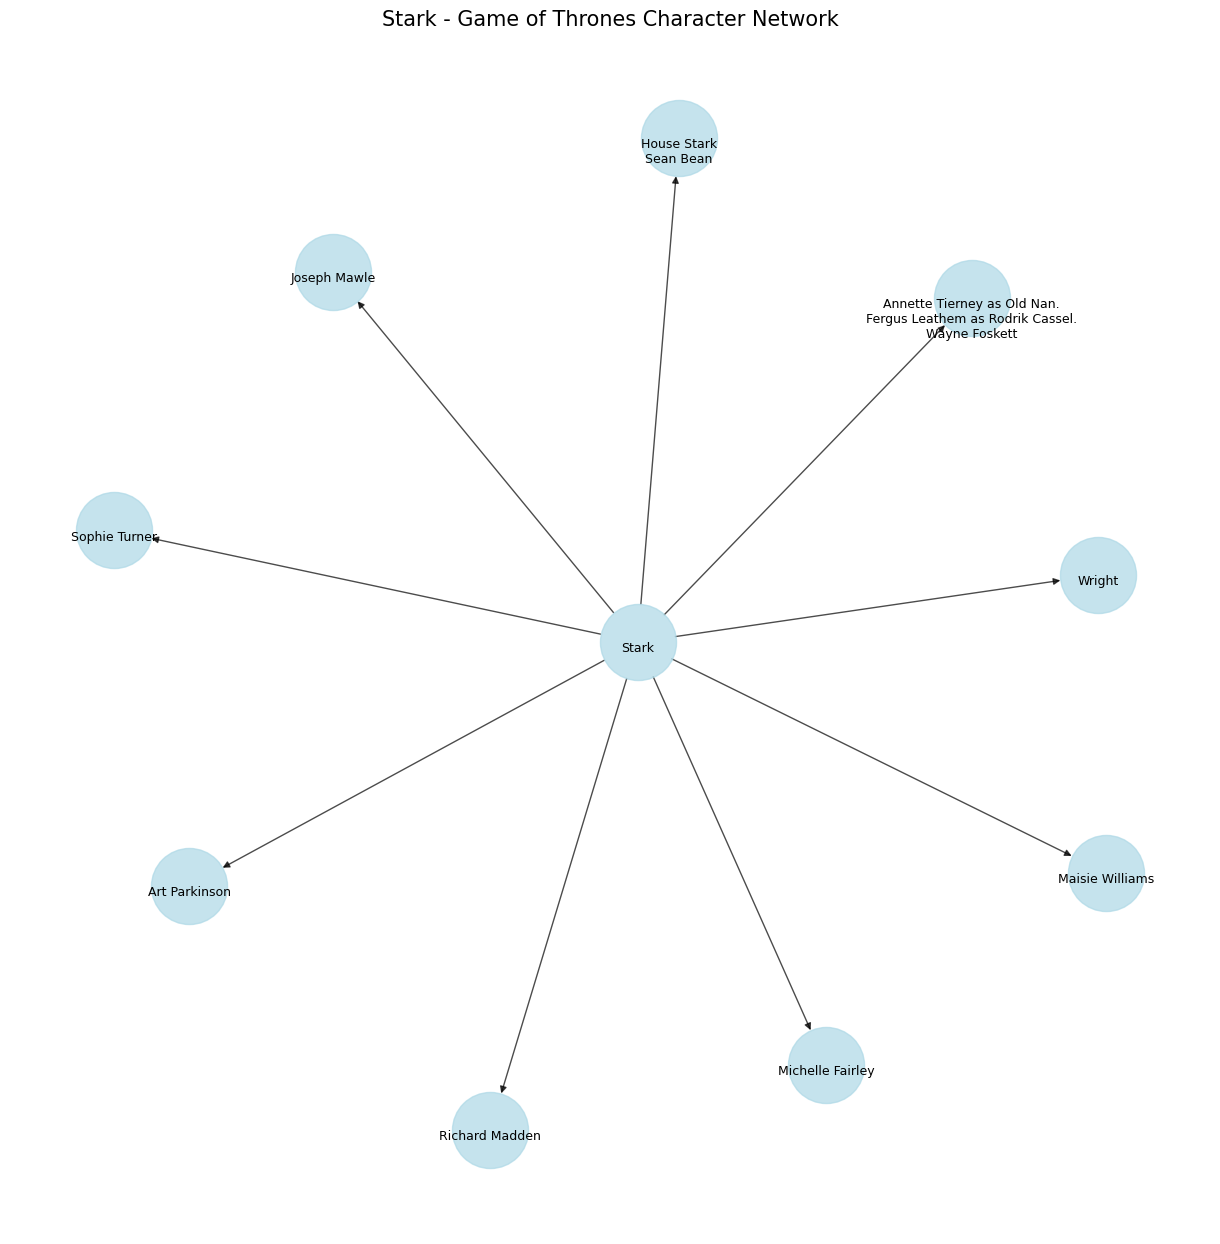

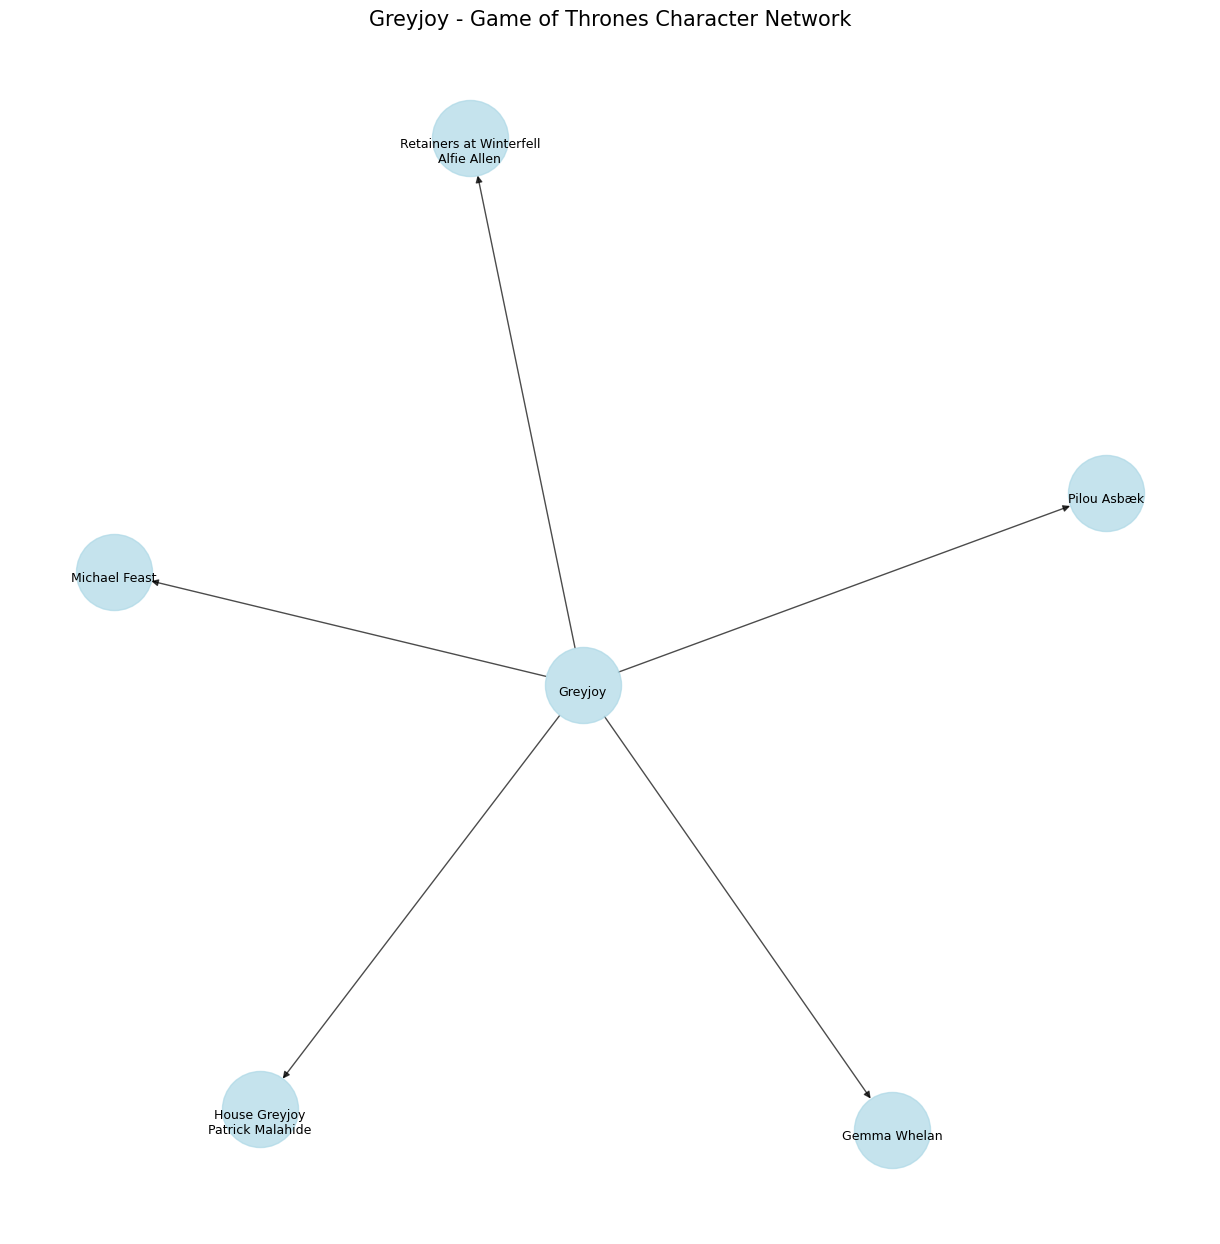

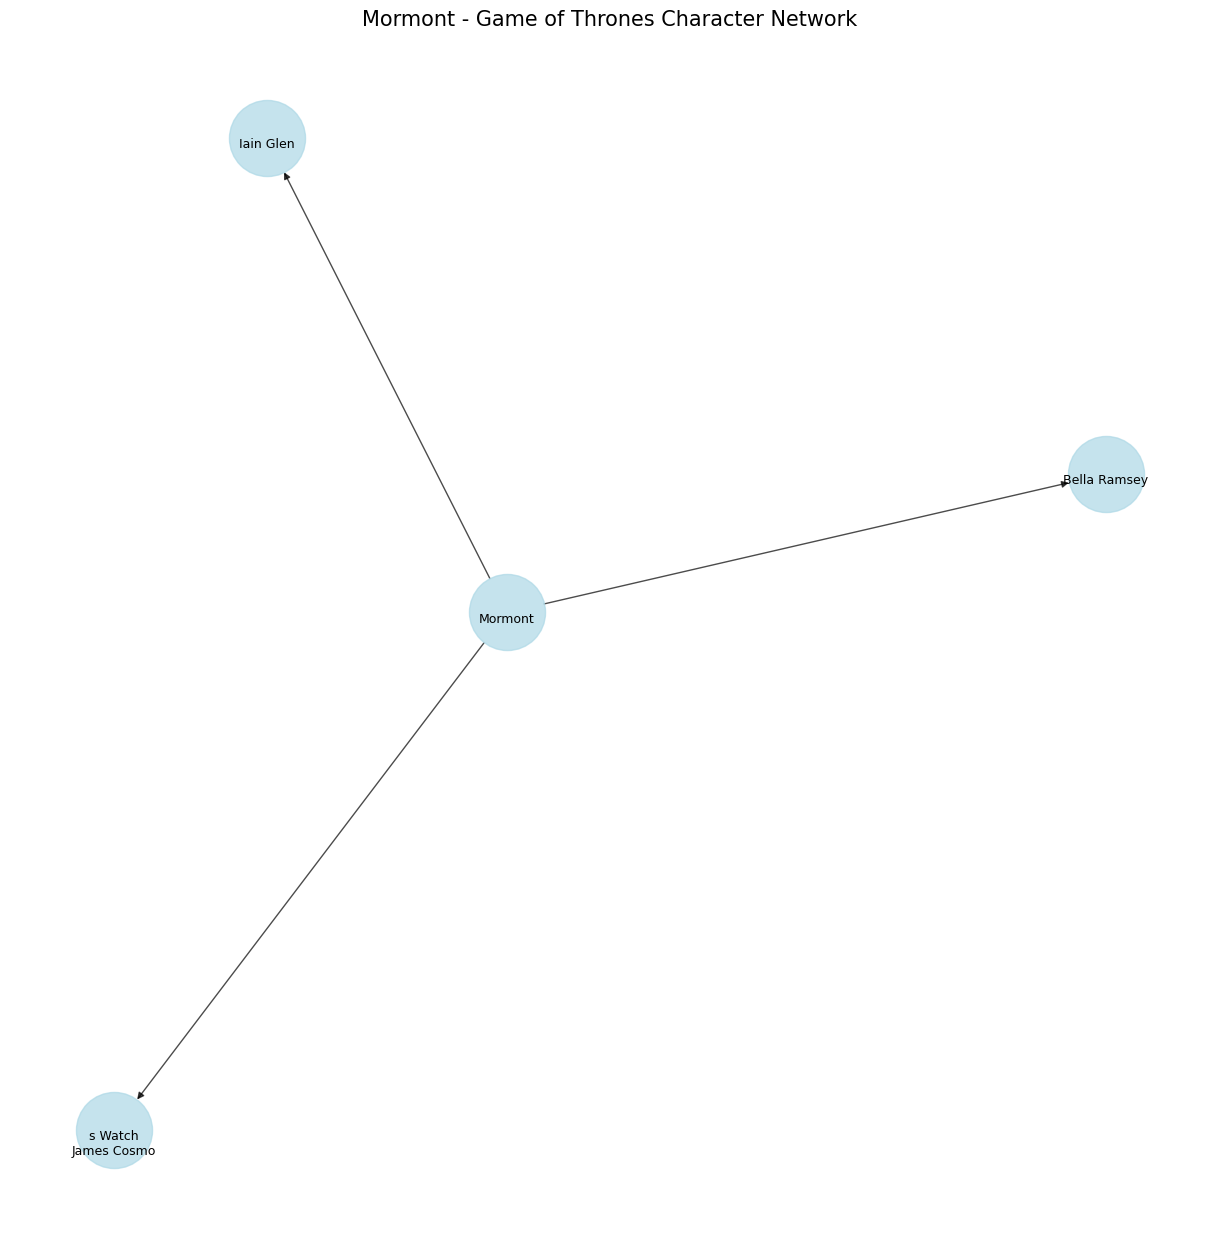

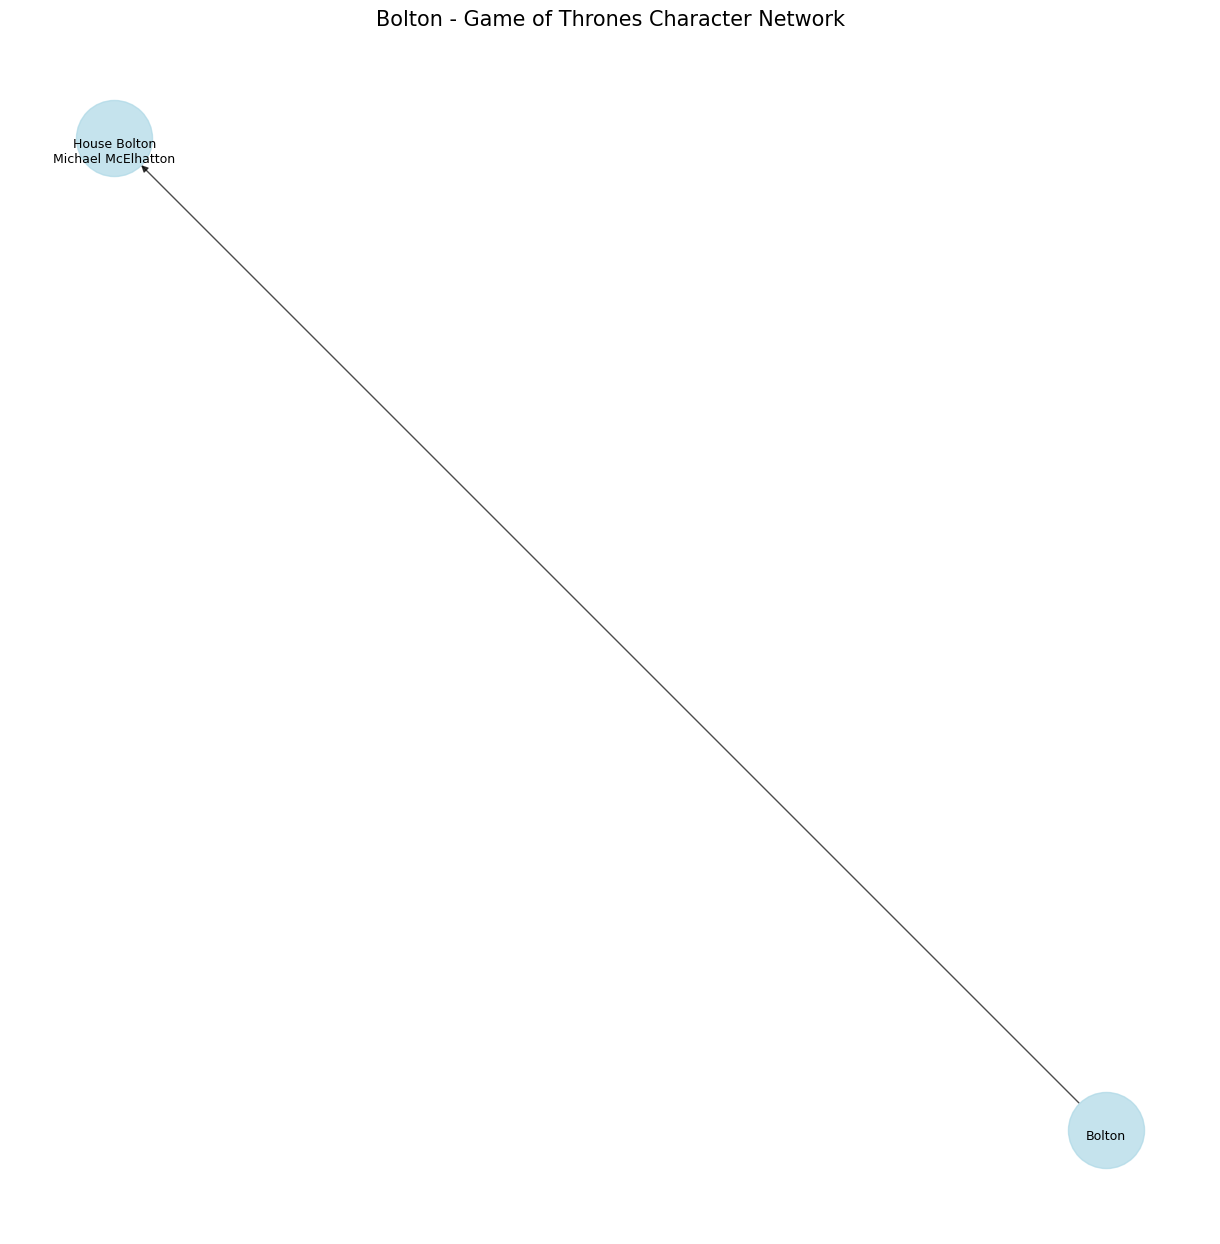

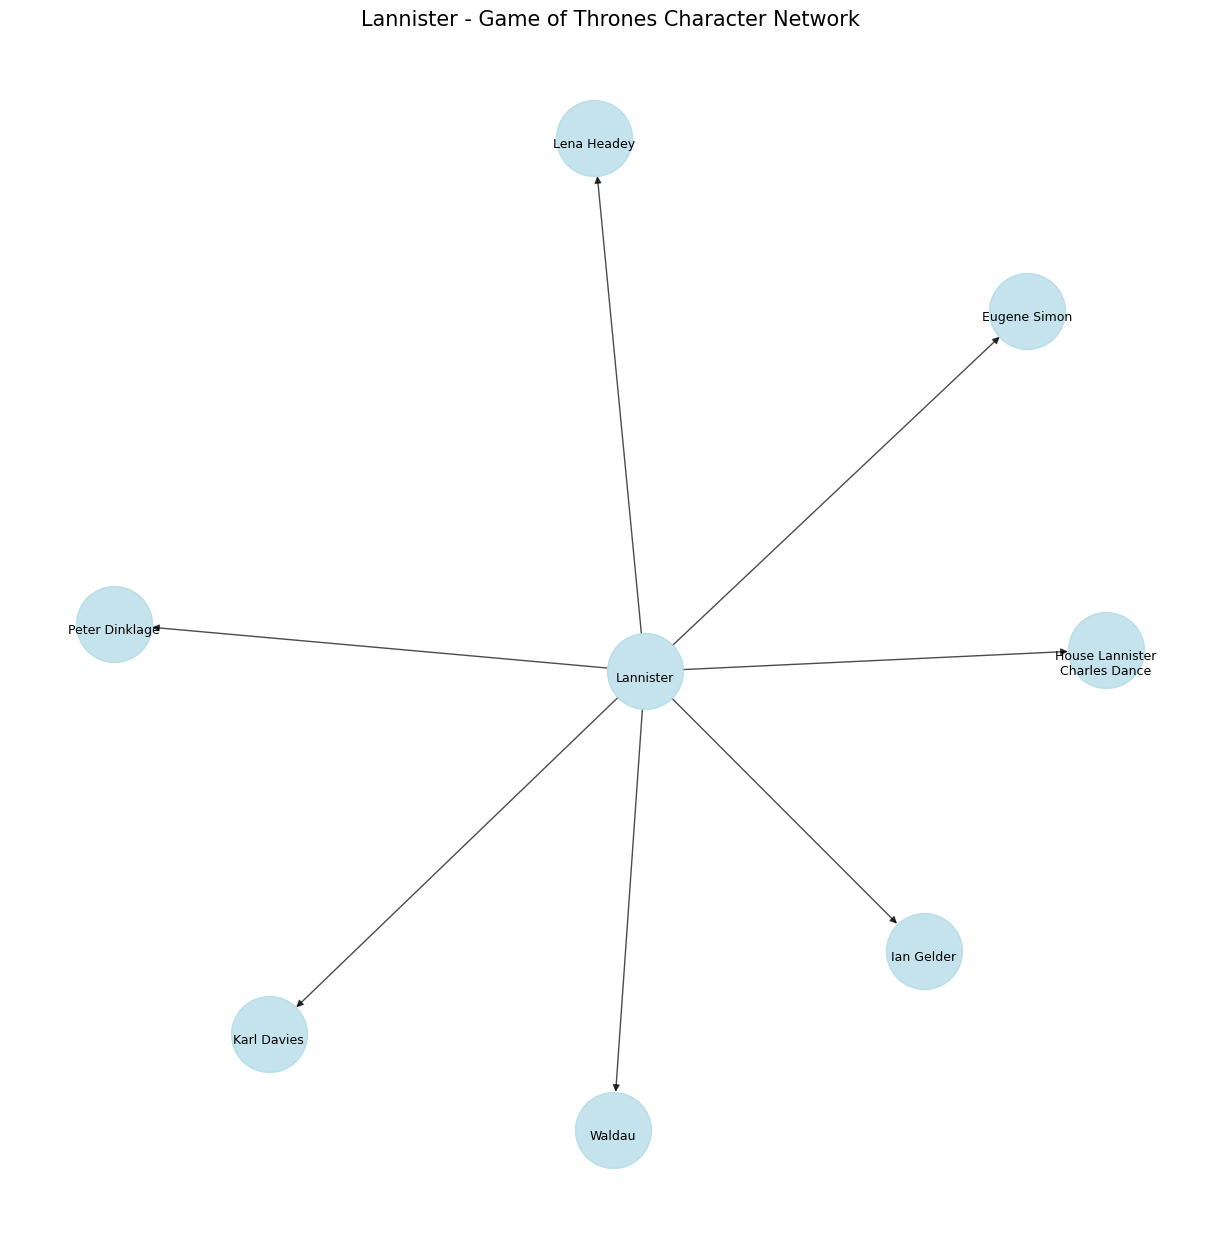

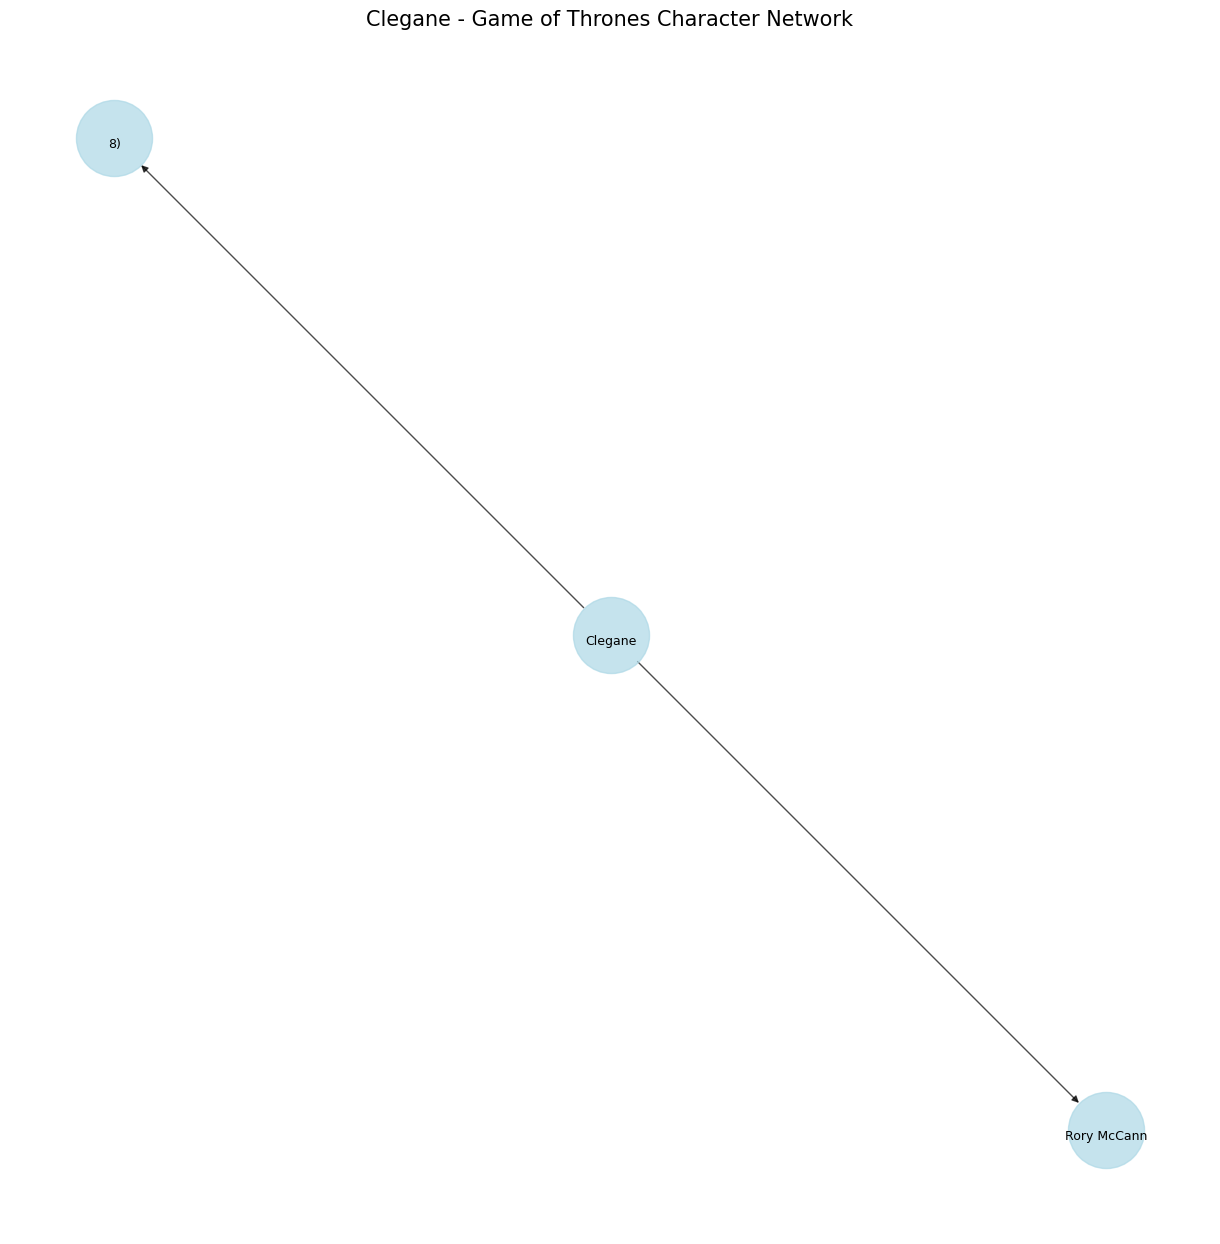

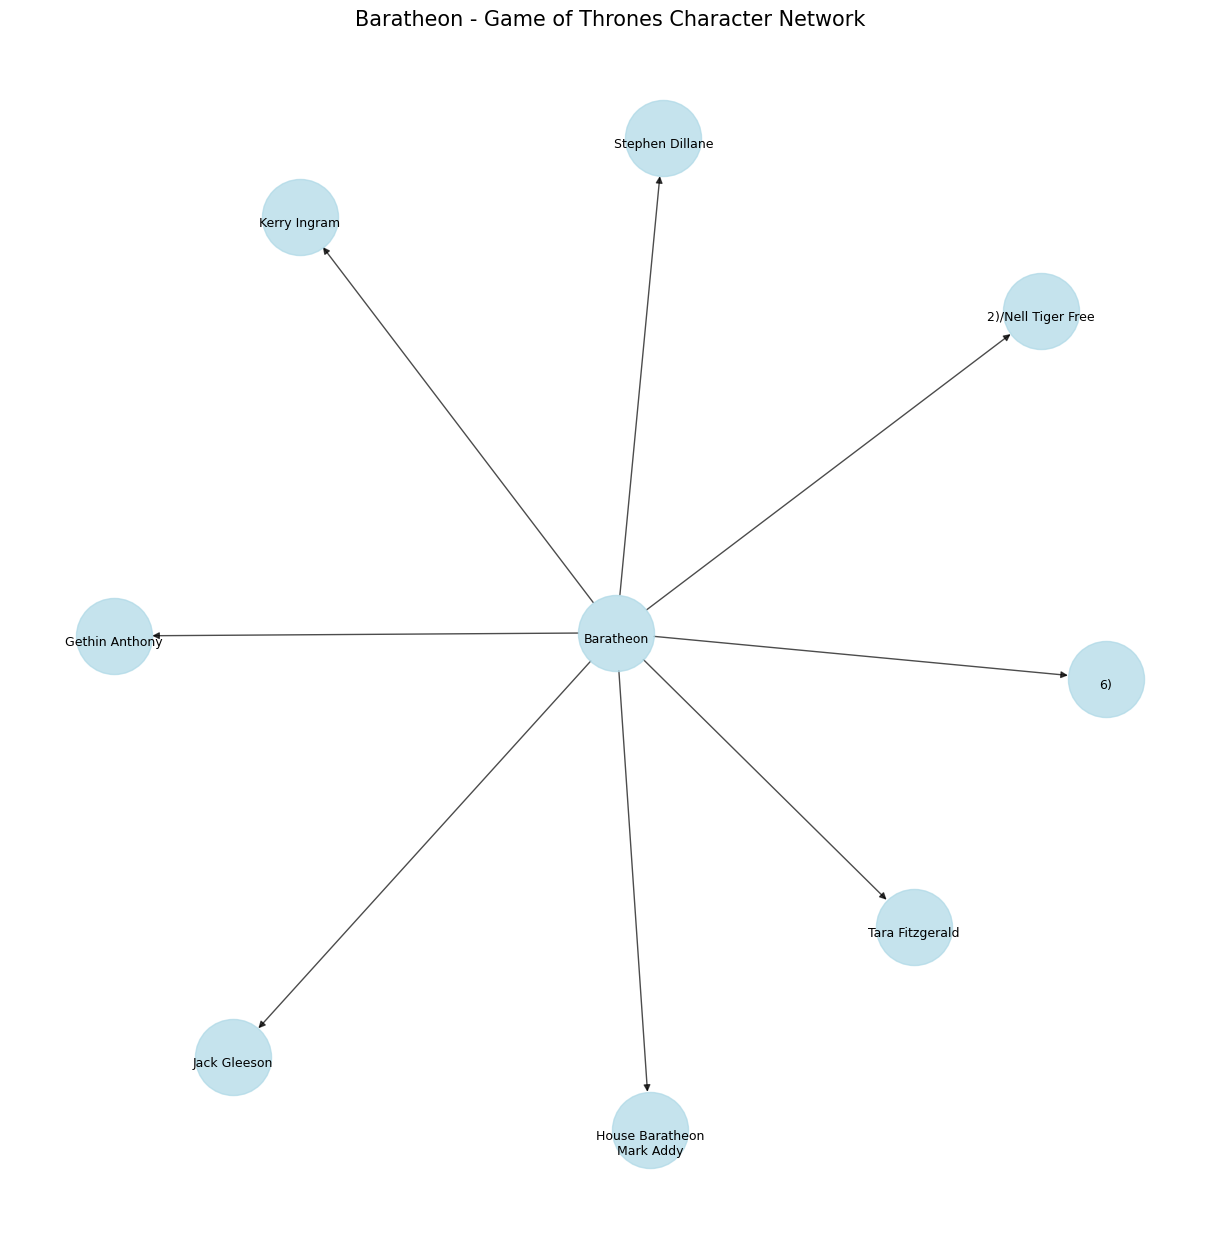

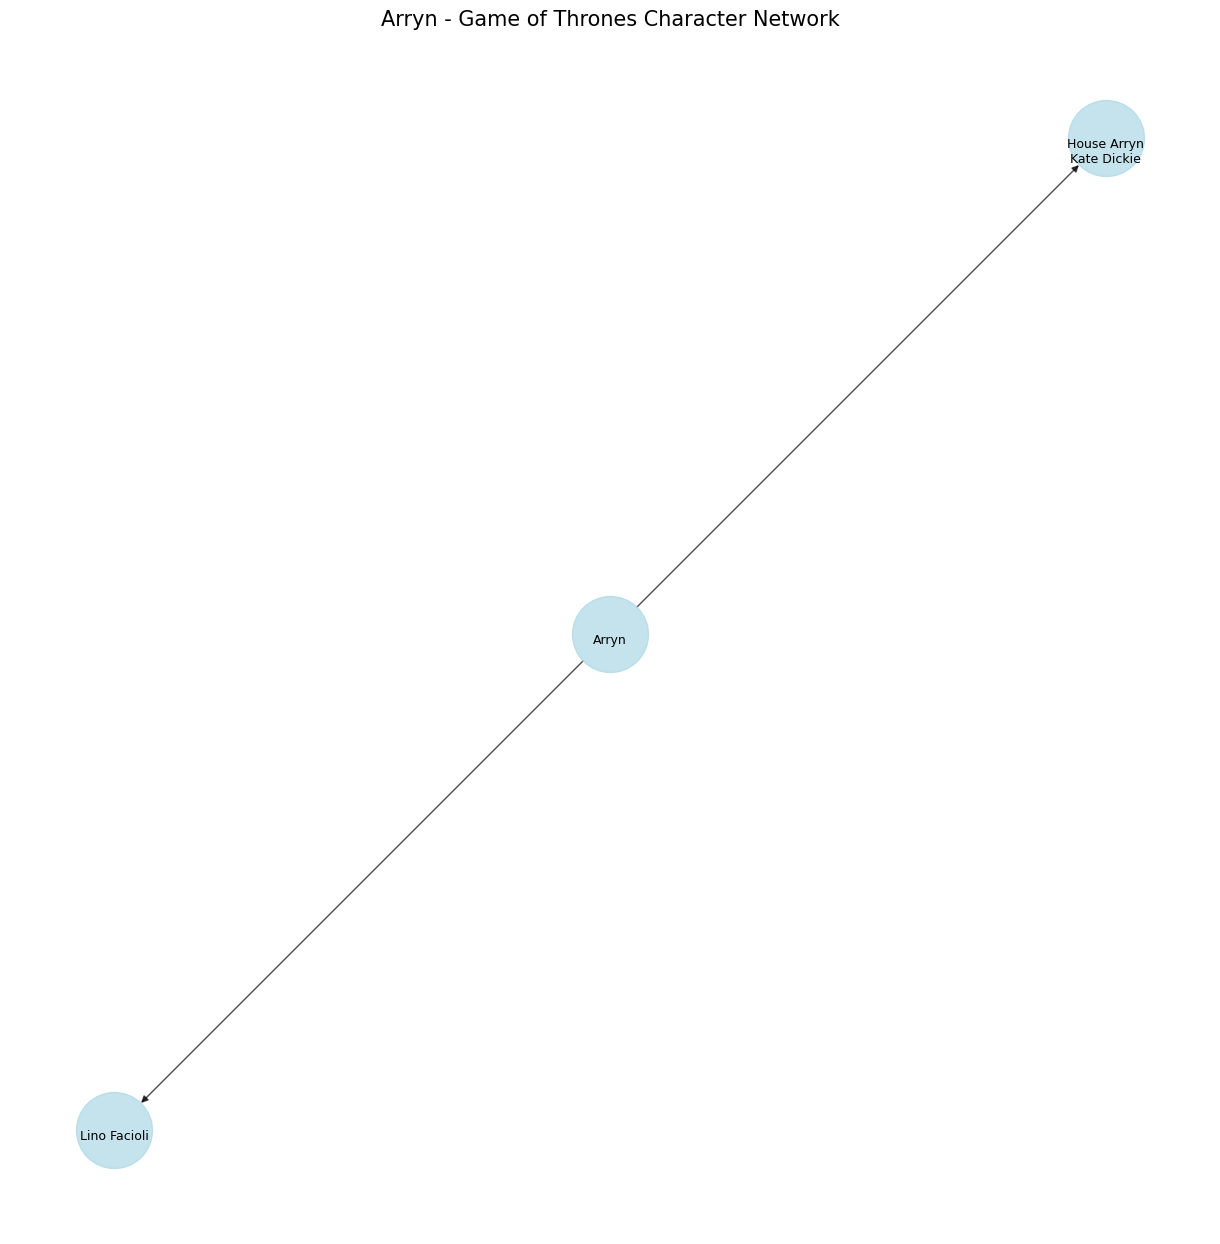

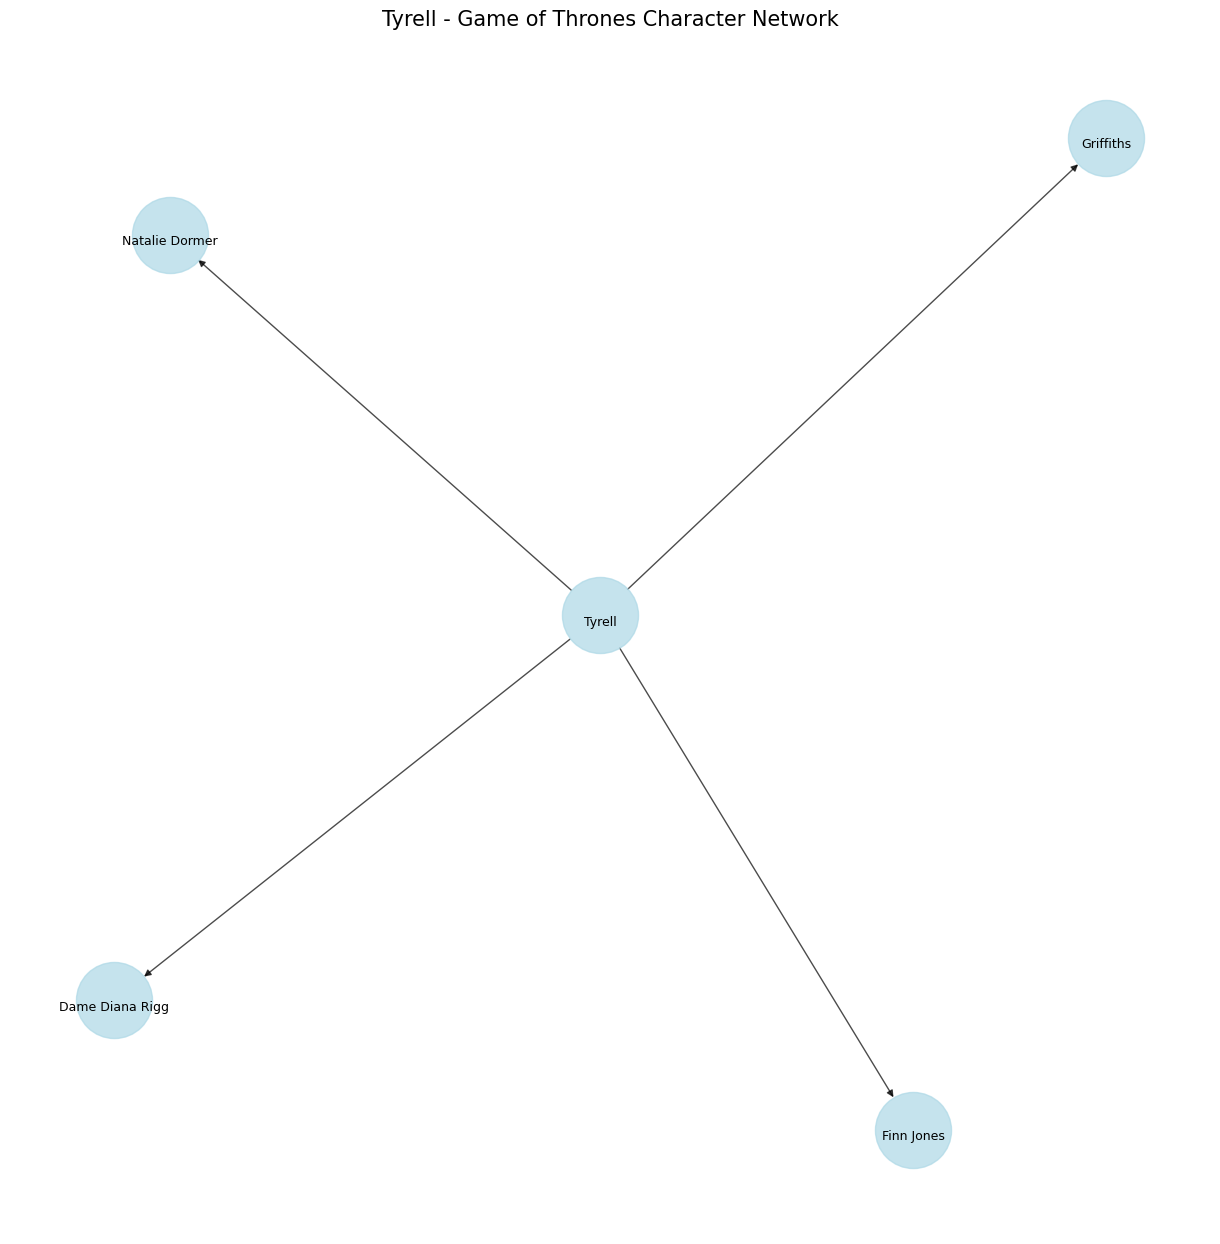

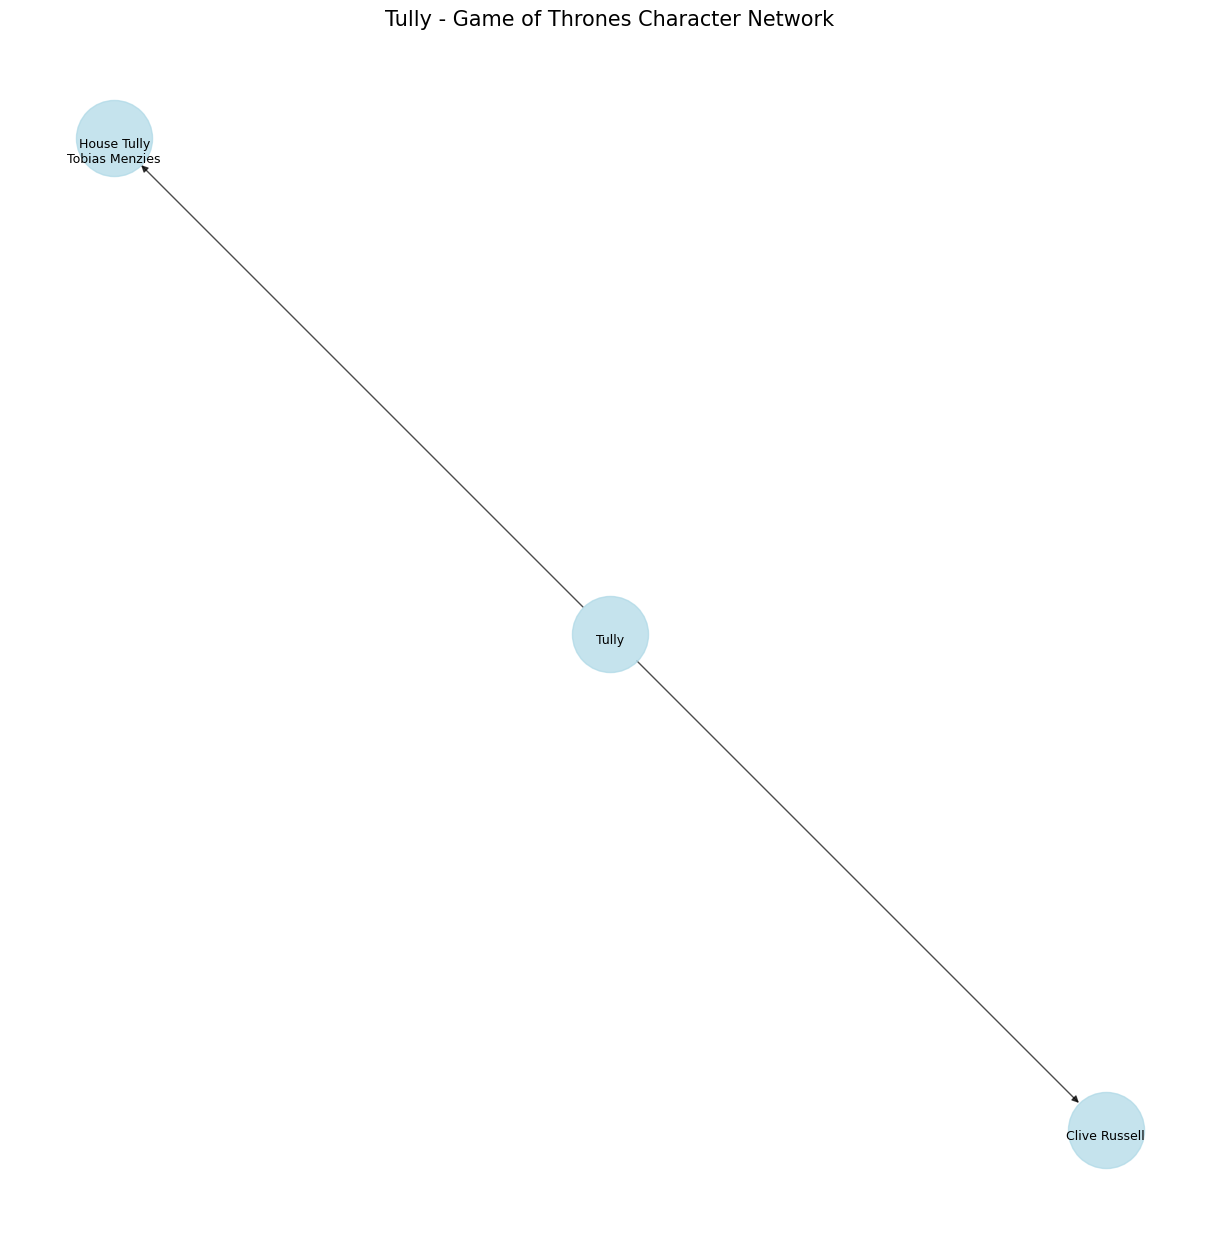

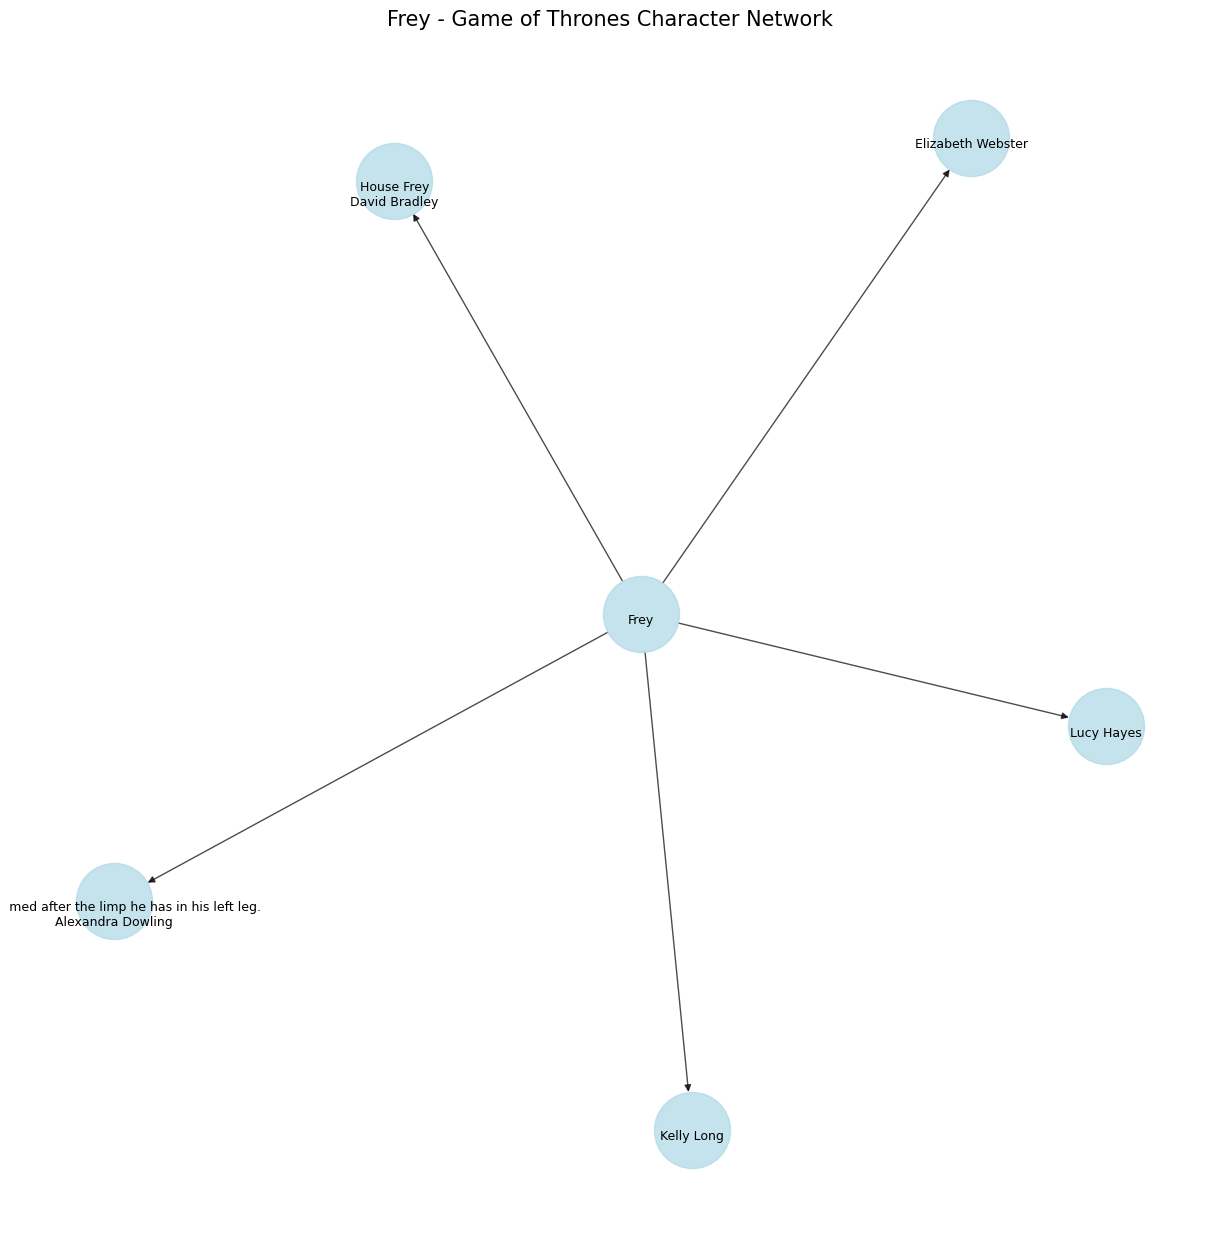

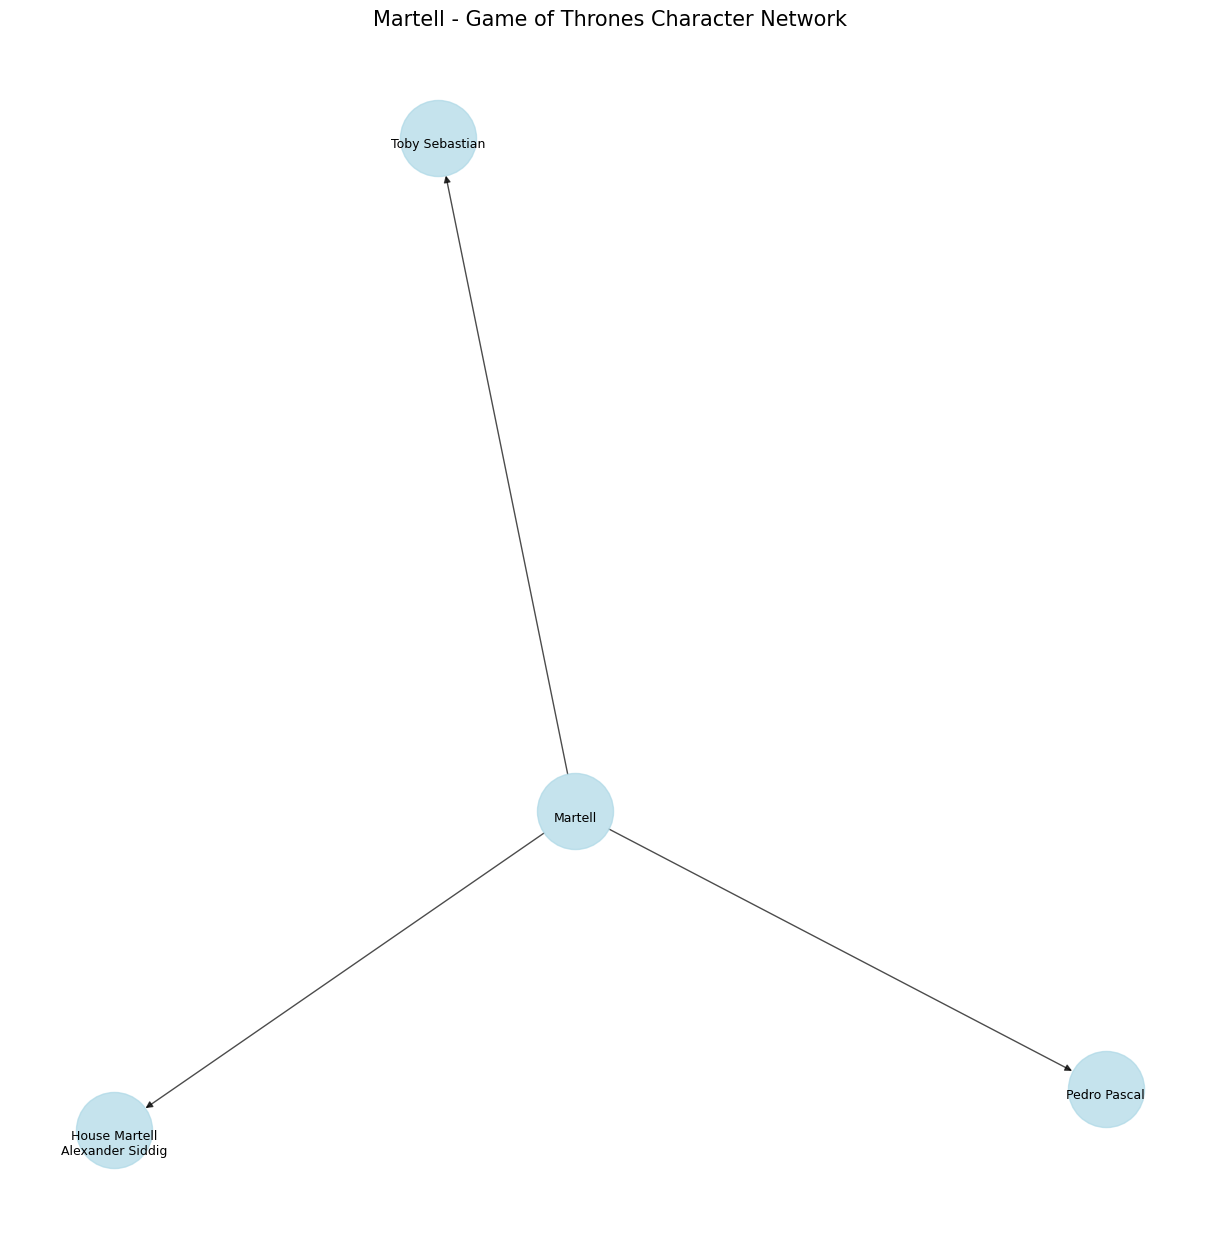

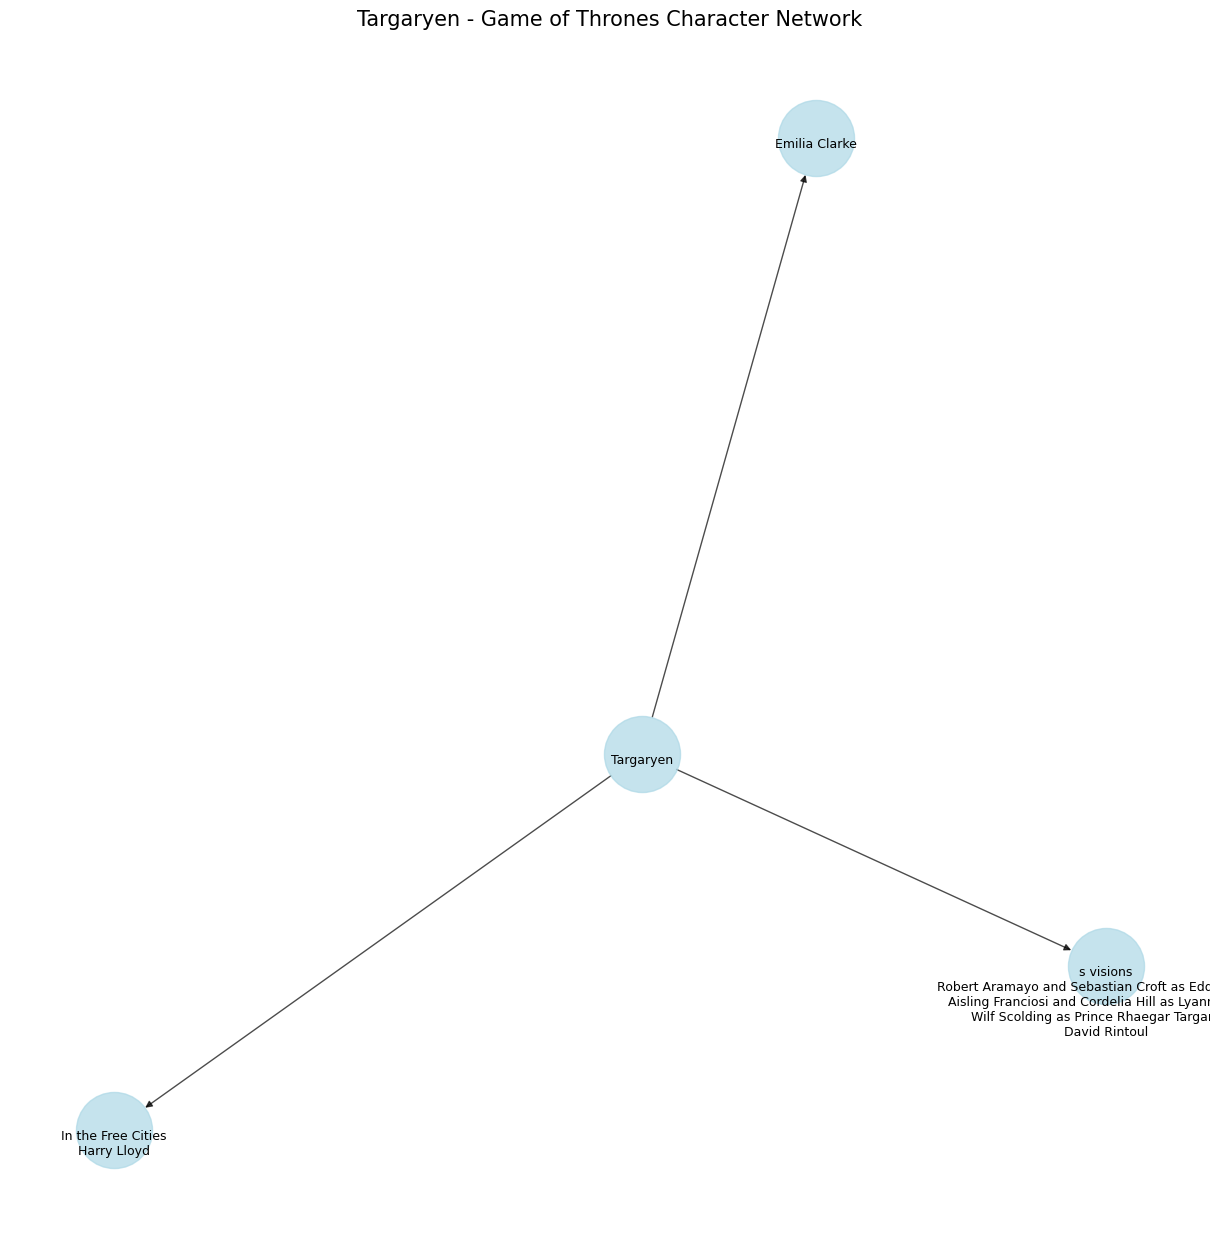

In [174]:

# Load the CSV file
csv_file = 'game_of_thrones_characters.csv'
df = pd.read_csv(csv_file)

# Get unique families from the DataFrame
families = df['Family'].unique()

# Iterate over each family to create separate graphs
for family in families:
    if family == "Unknown":  
        continue

    # Creating a directed graph for this family
    G = nx.DiGraph()

    # Filter data for the current family
    family_data = df[df['Family'] == family]

    # Add nodes and edges for the current family's graph
    for _, row in family_data.iterrows():
        actor = row['Actor']
        character = row['Character']
        description = row['Description']

        # Add the character node with attributes
        G.add_node(character, actor=actor, description=description)

        # Add an edge from the family to the character
        G.add_node(family)  
        G.add_edge(family, character)

    # Draw the network for the current family
    # Using spring layout for better node spacing
    pos = nx.spring_layout(G, k=0.3, iterations=50)  # Adjust k for spacing, iterations for stability
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=False, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', alpha=0.7)

    # Add labels without overlap
    node_labels = {node: G.nodes[node]['actor'] if 'actor' in G.nodes[node] else node for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9, verticalalignment='top')

    # Set the title and display the graph
    plt.title(f'{family} - Game of Thrones Character Network', fontsize=15)
    plt.show()


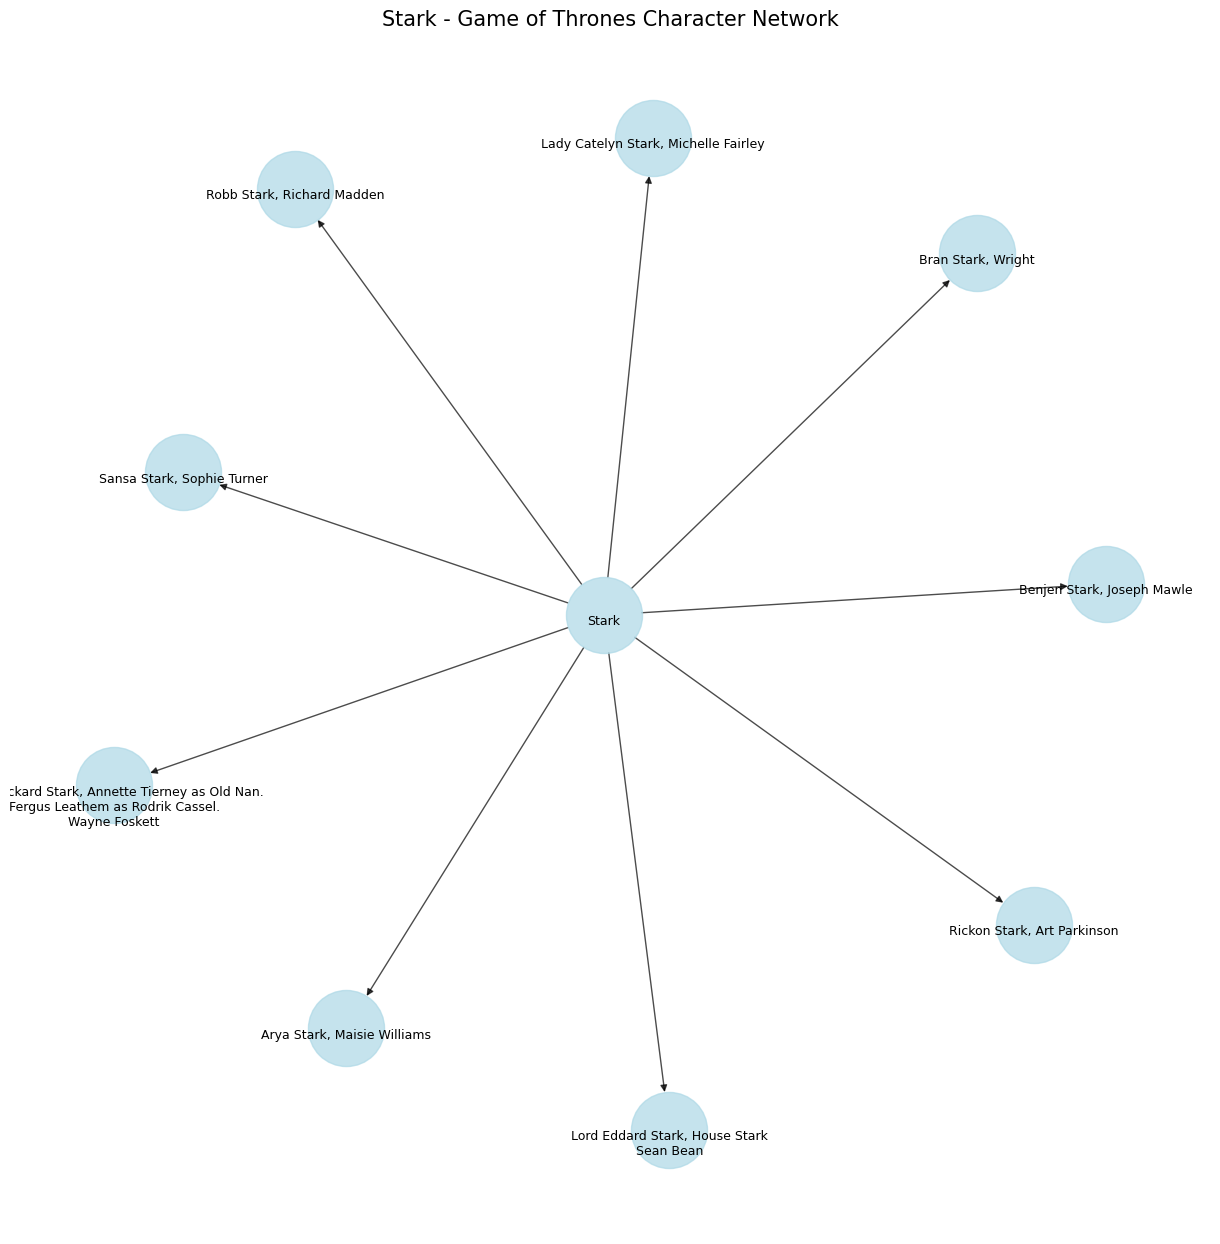

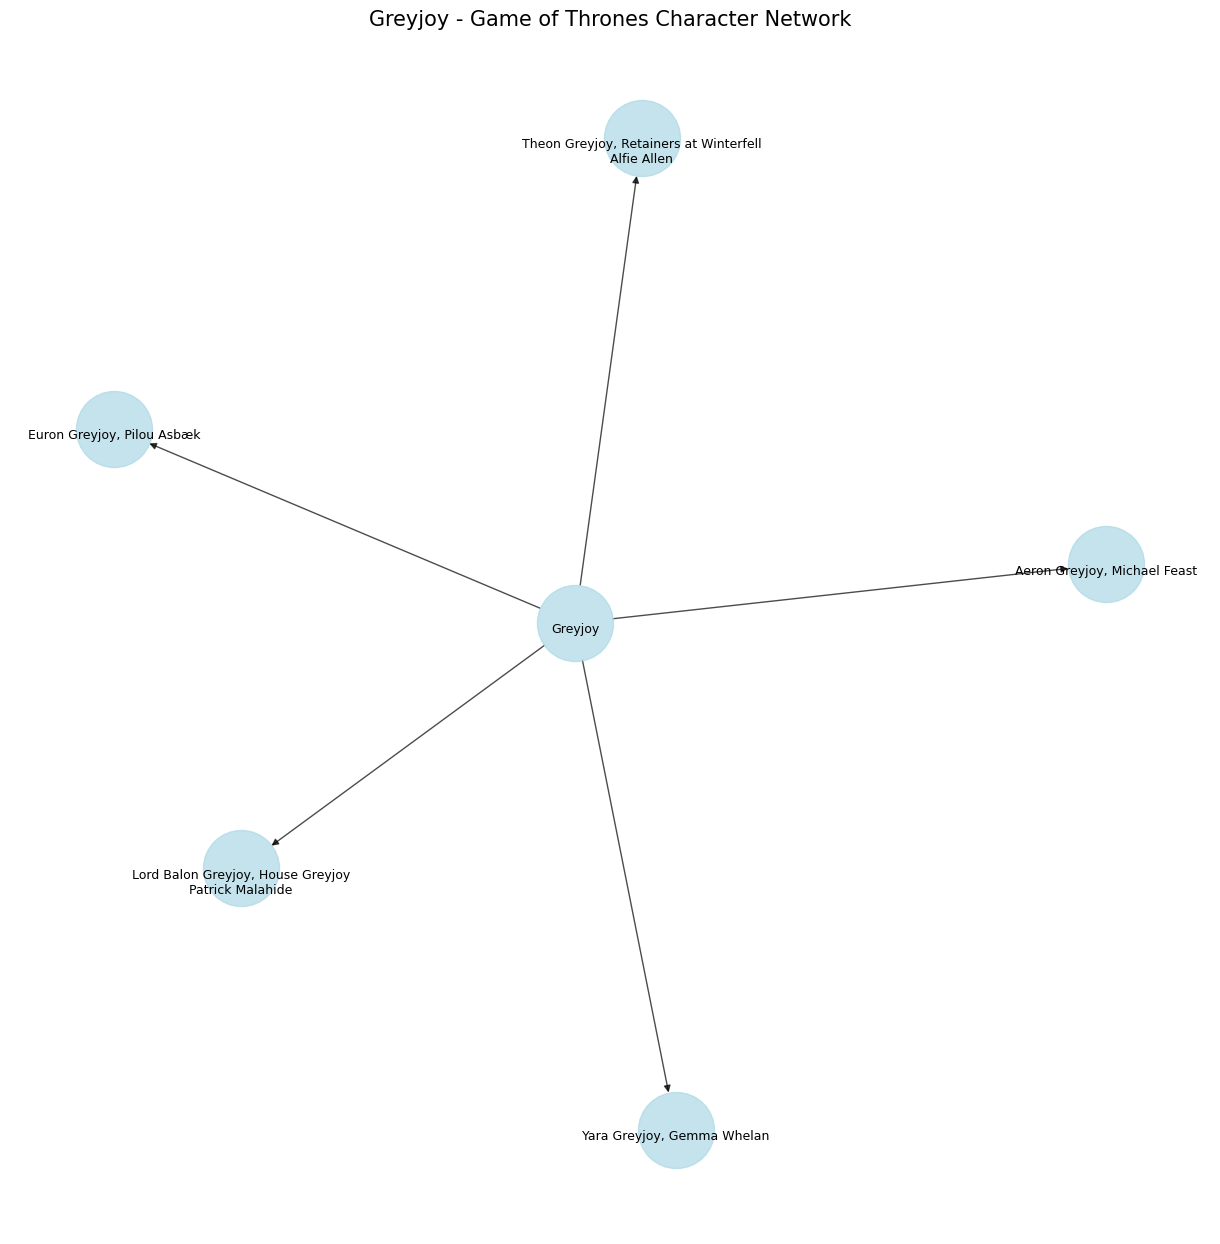

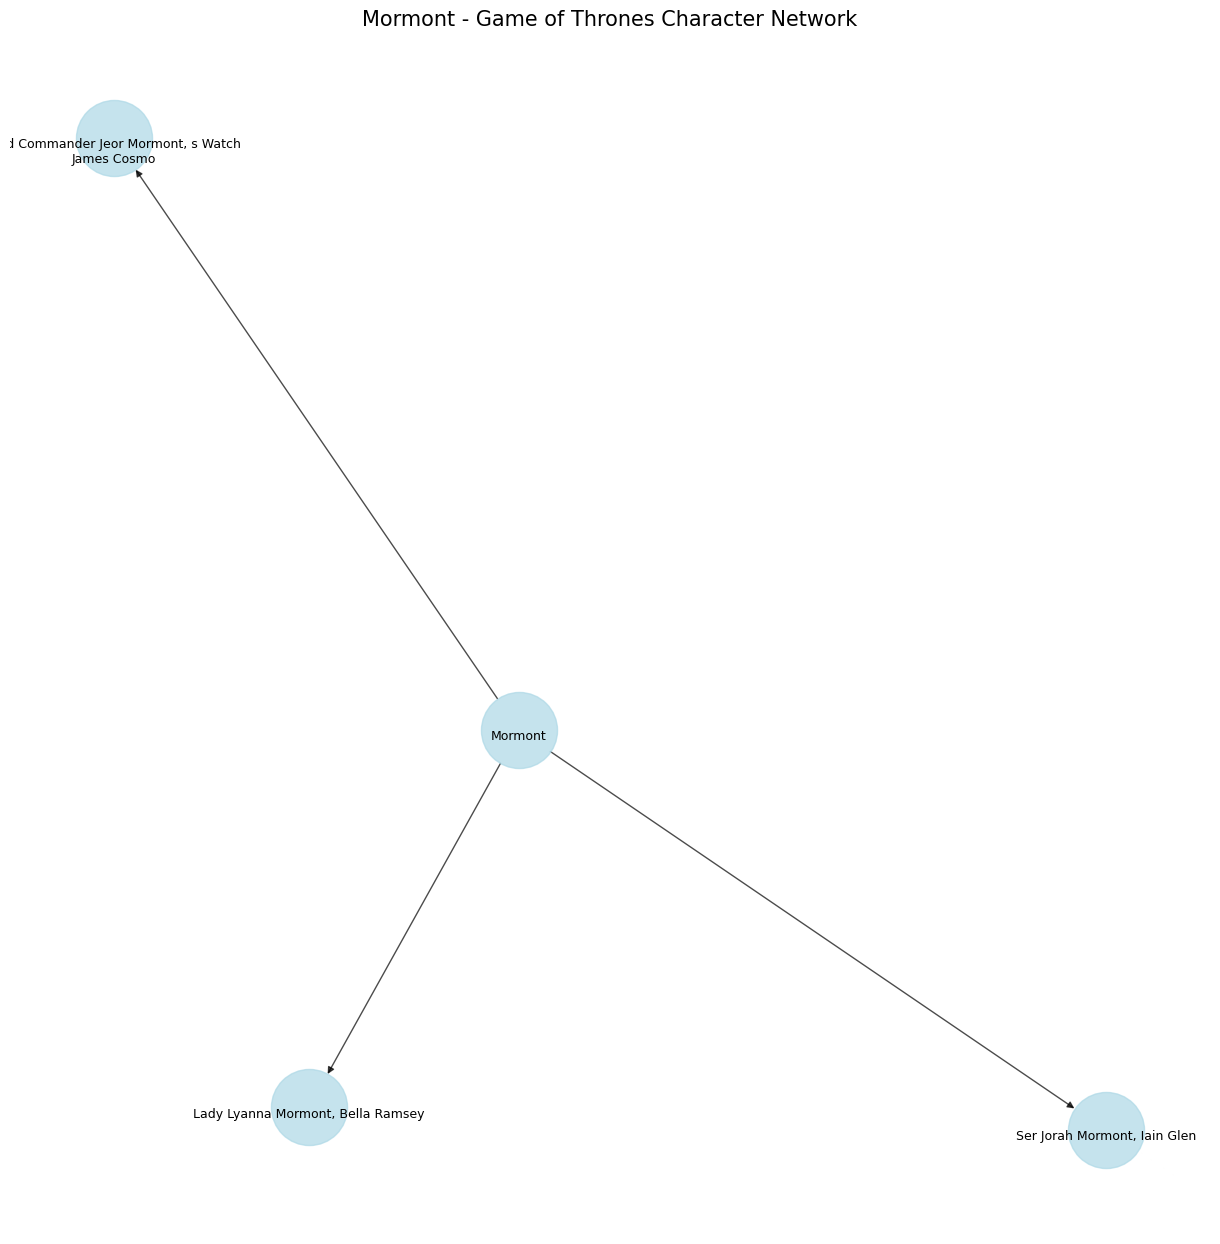

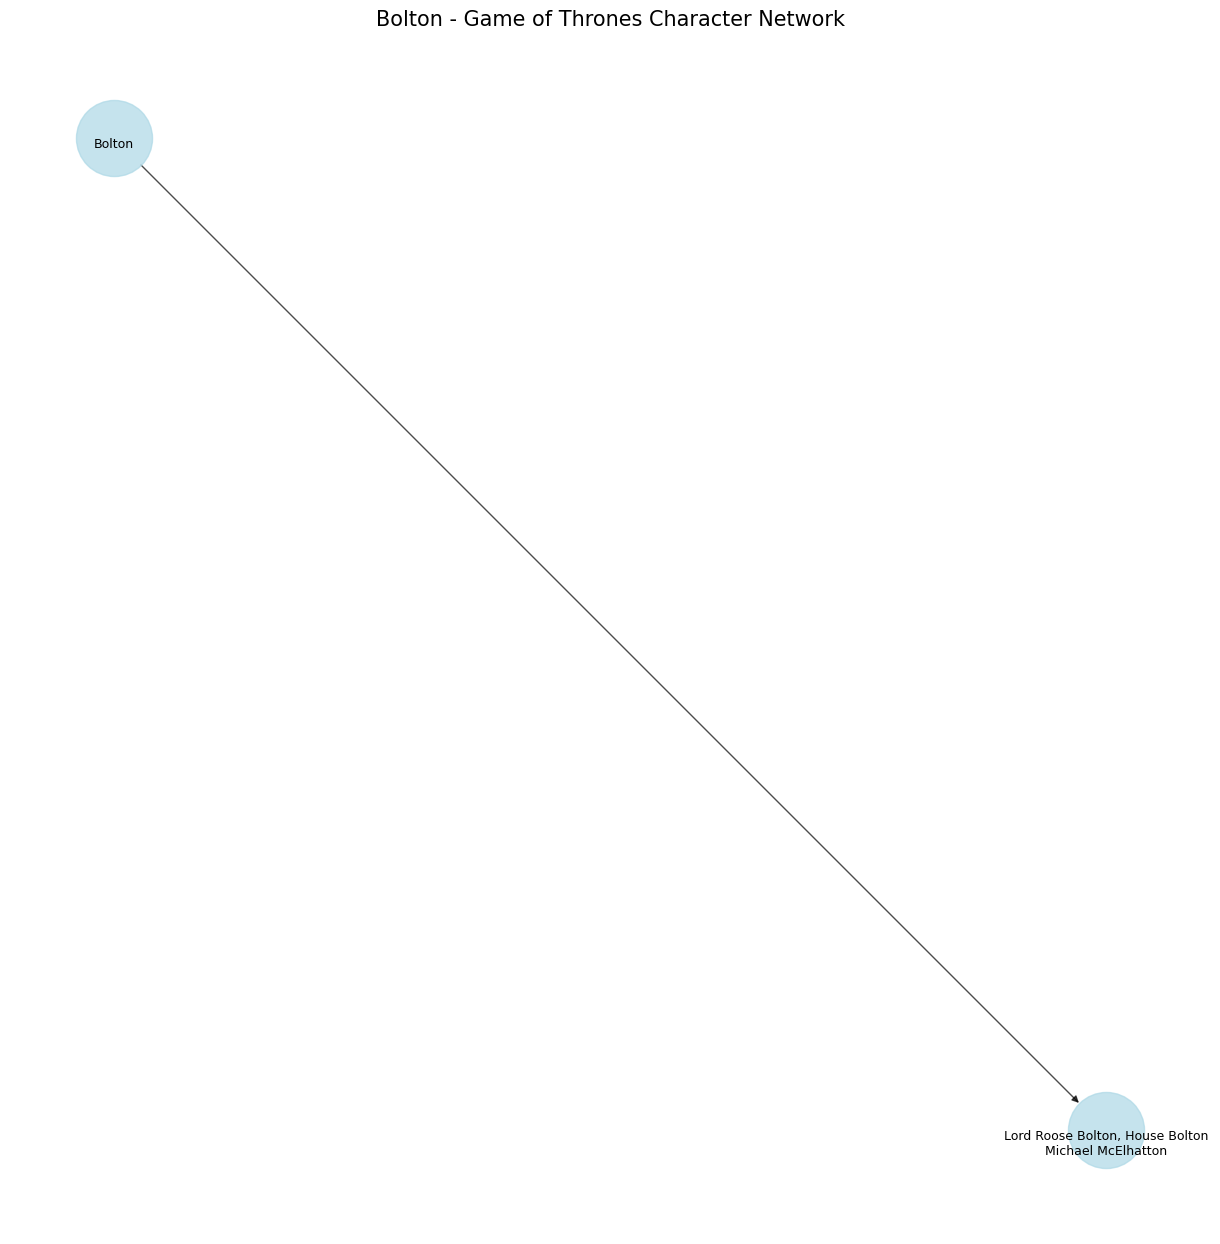

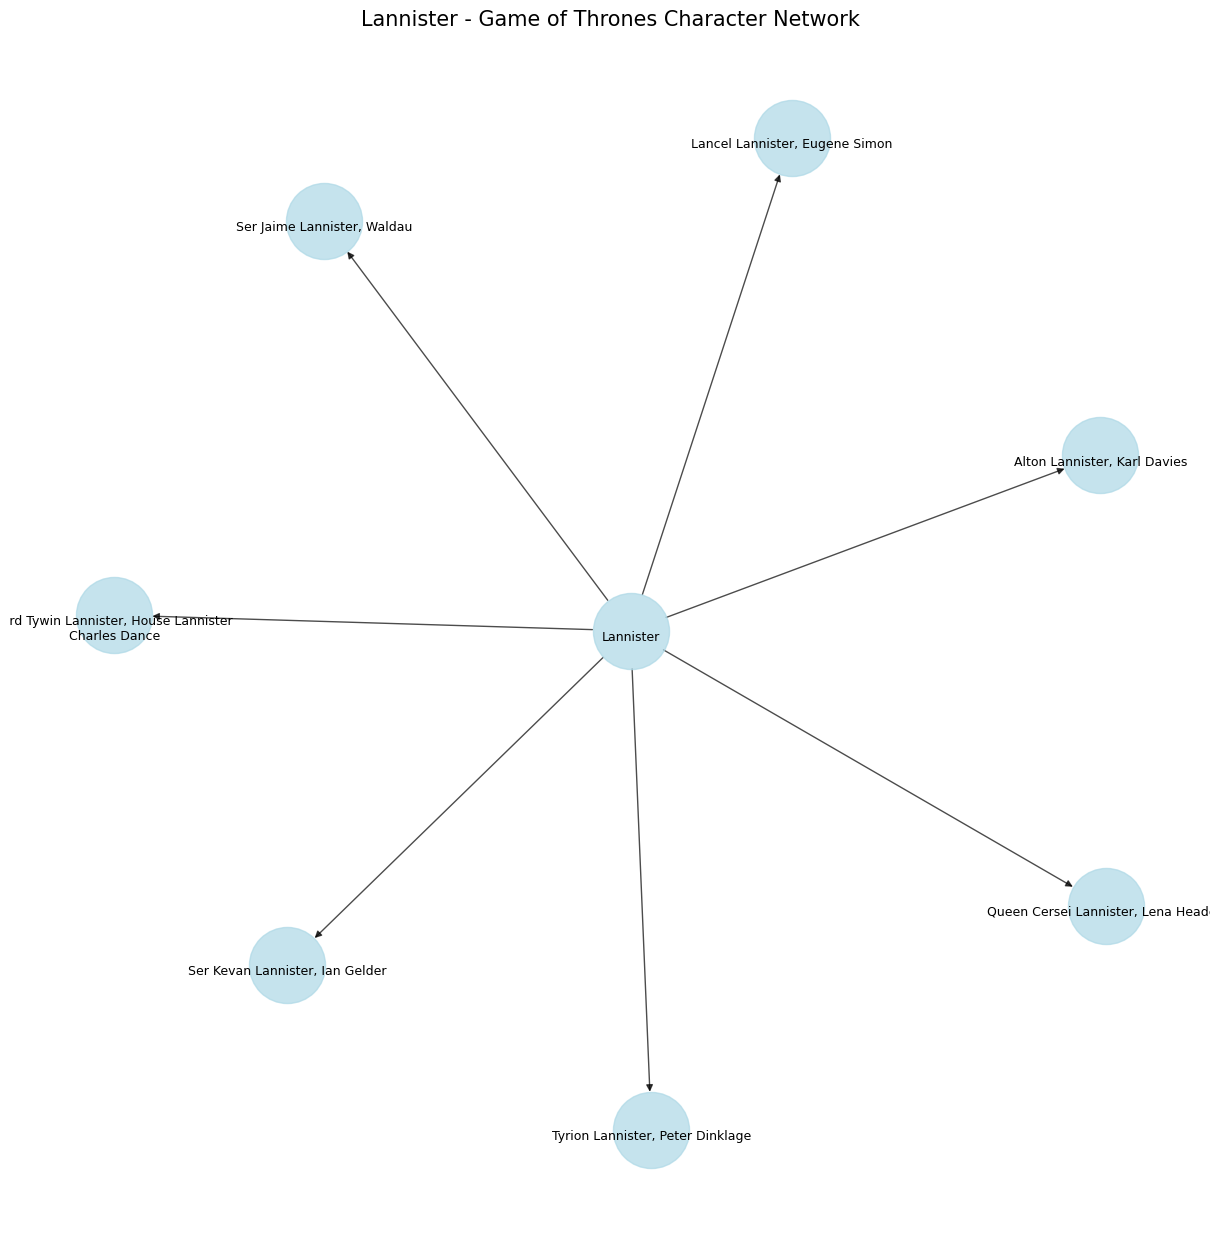

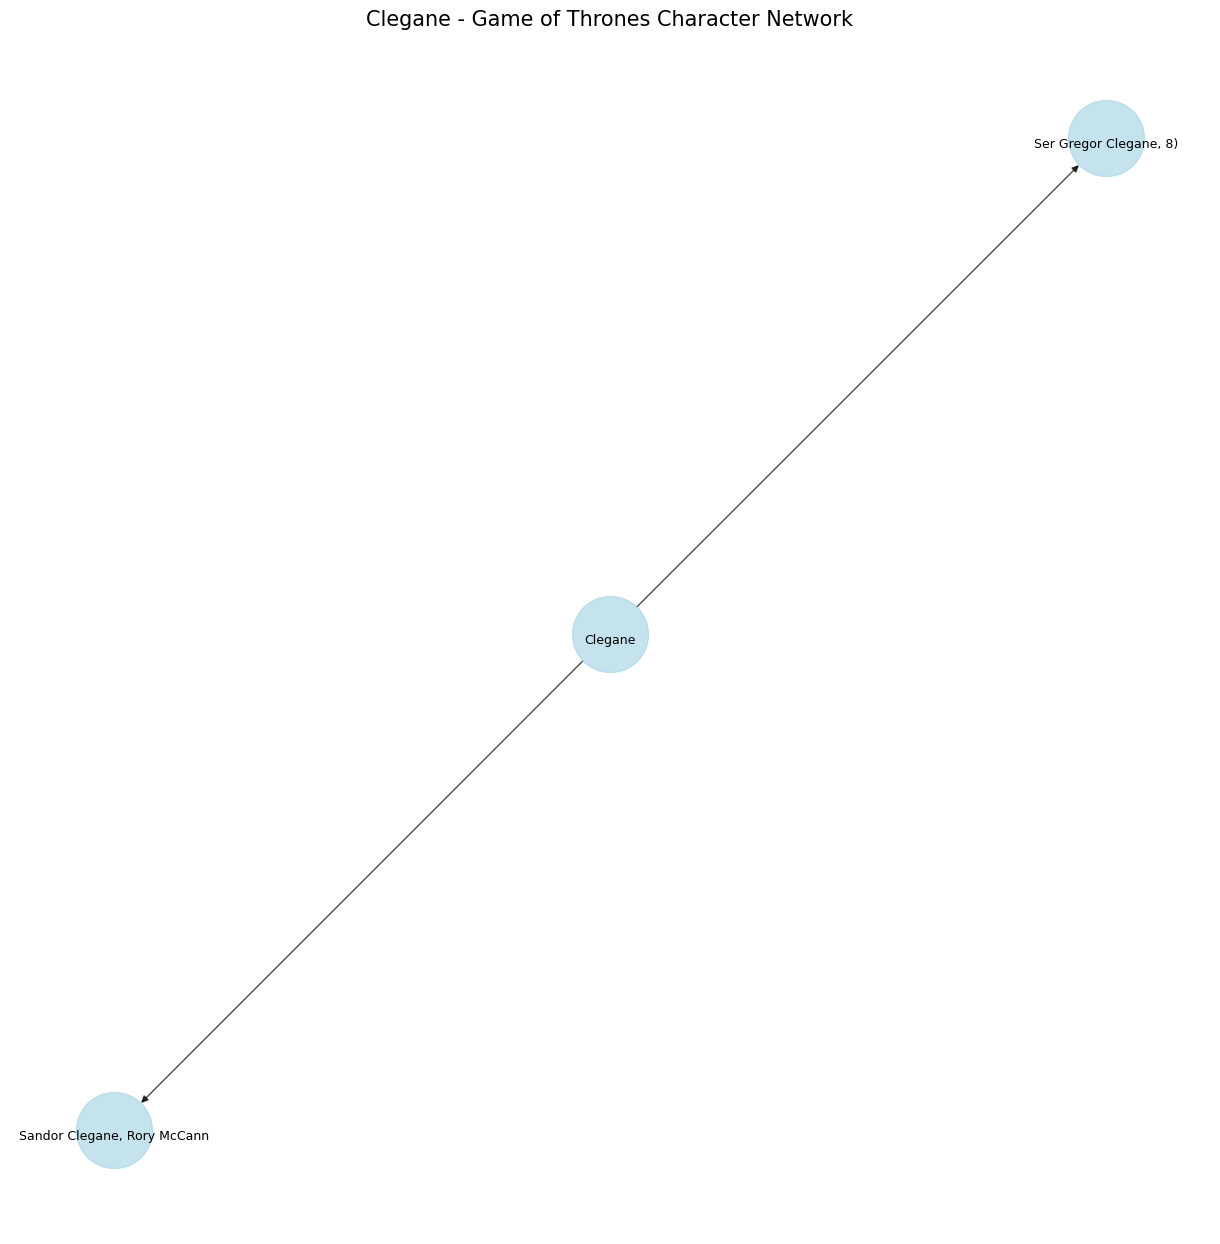

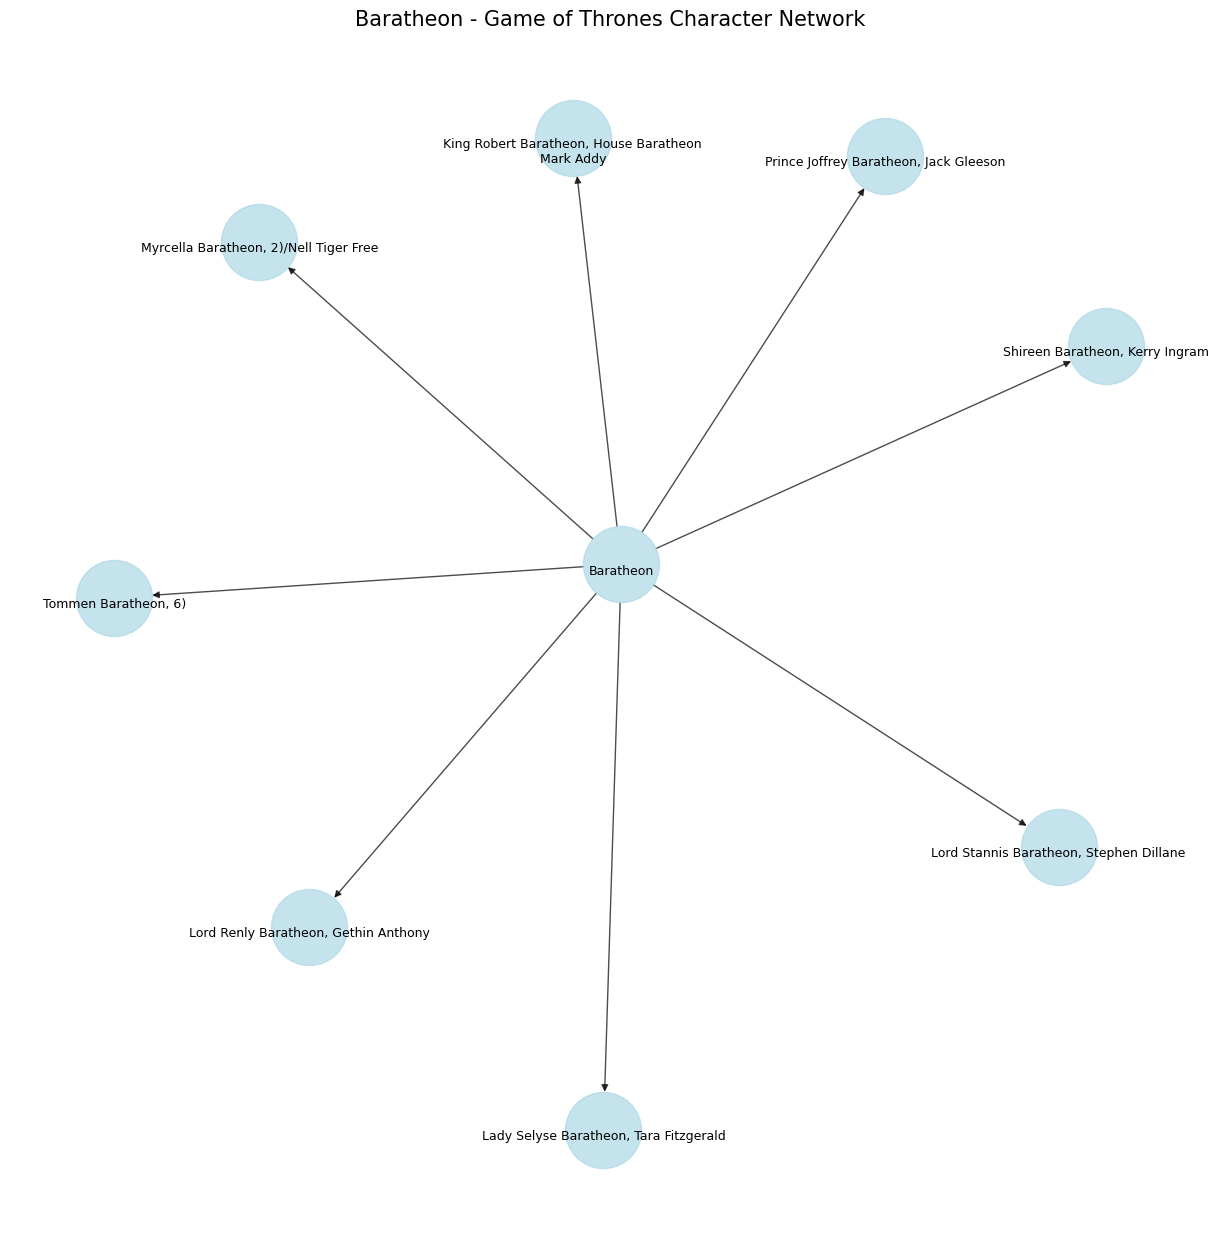

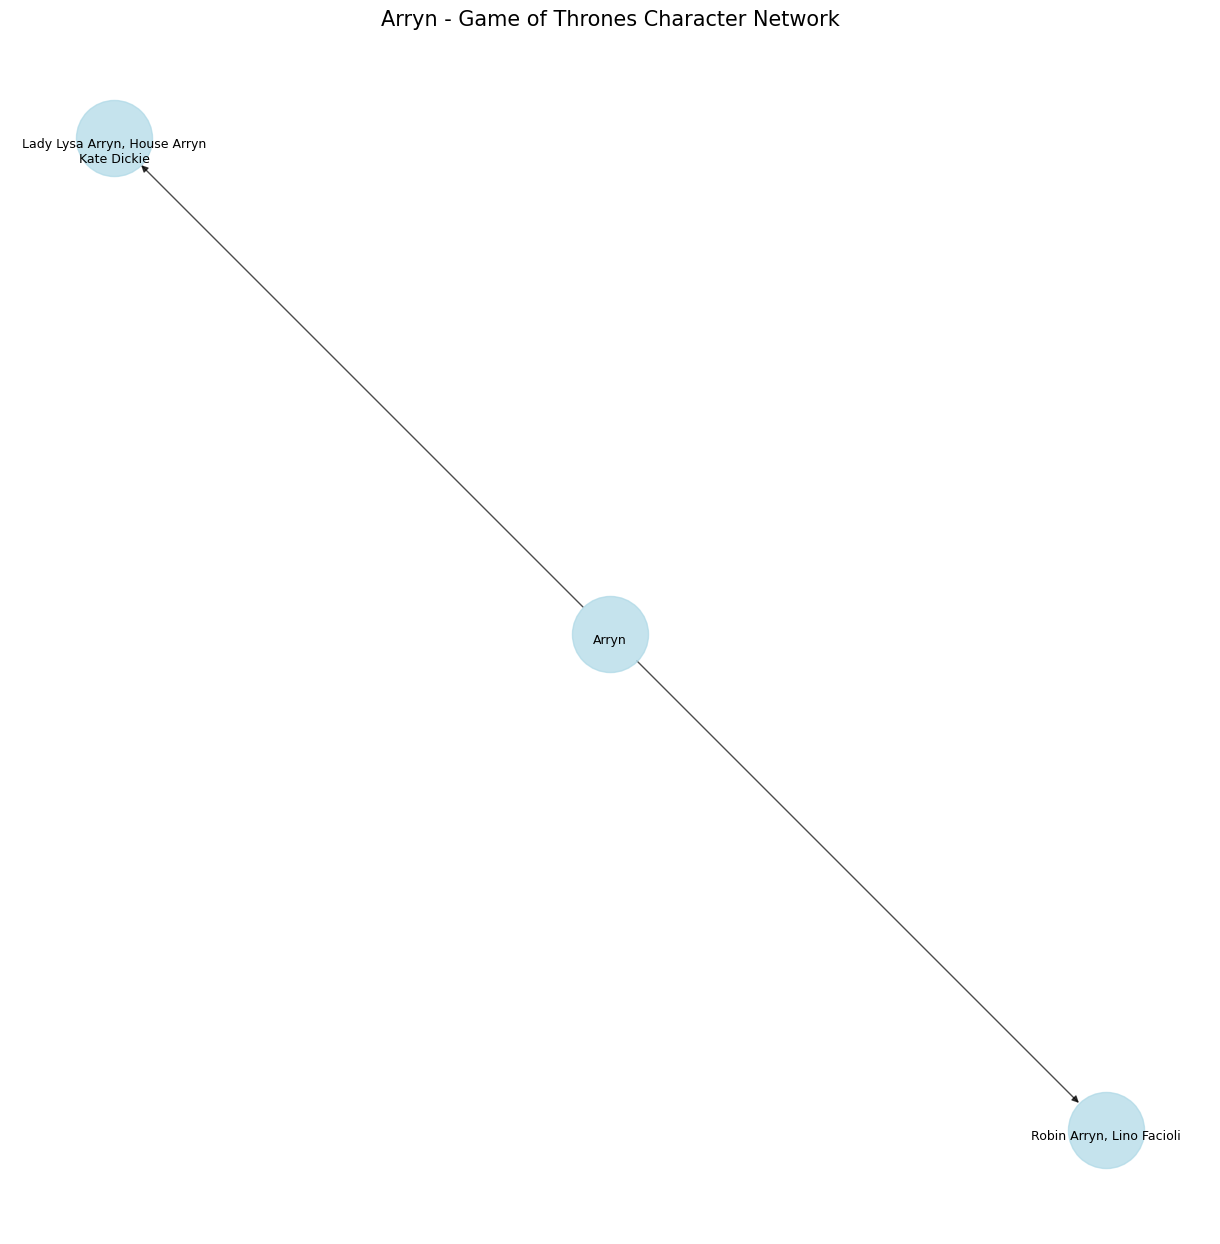

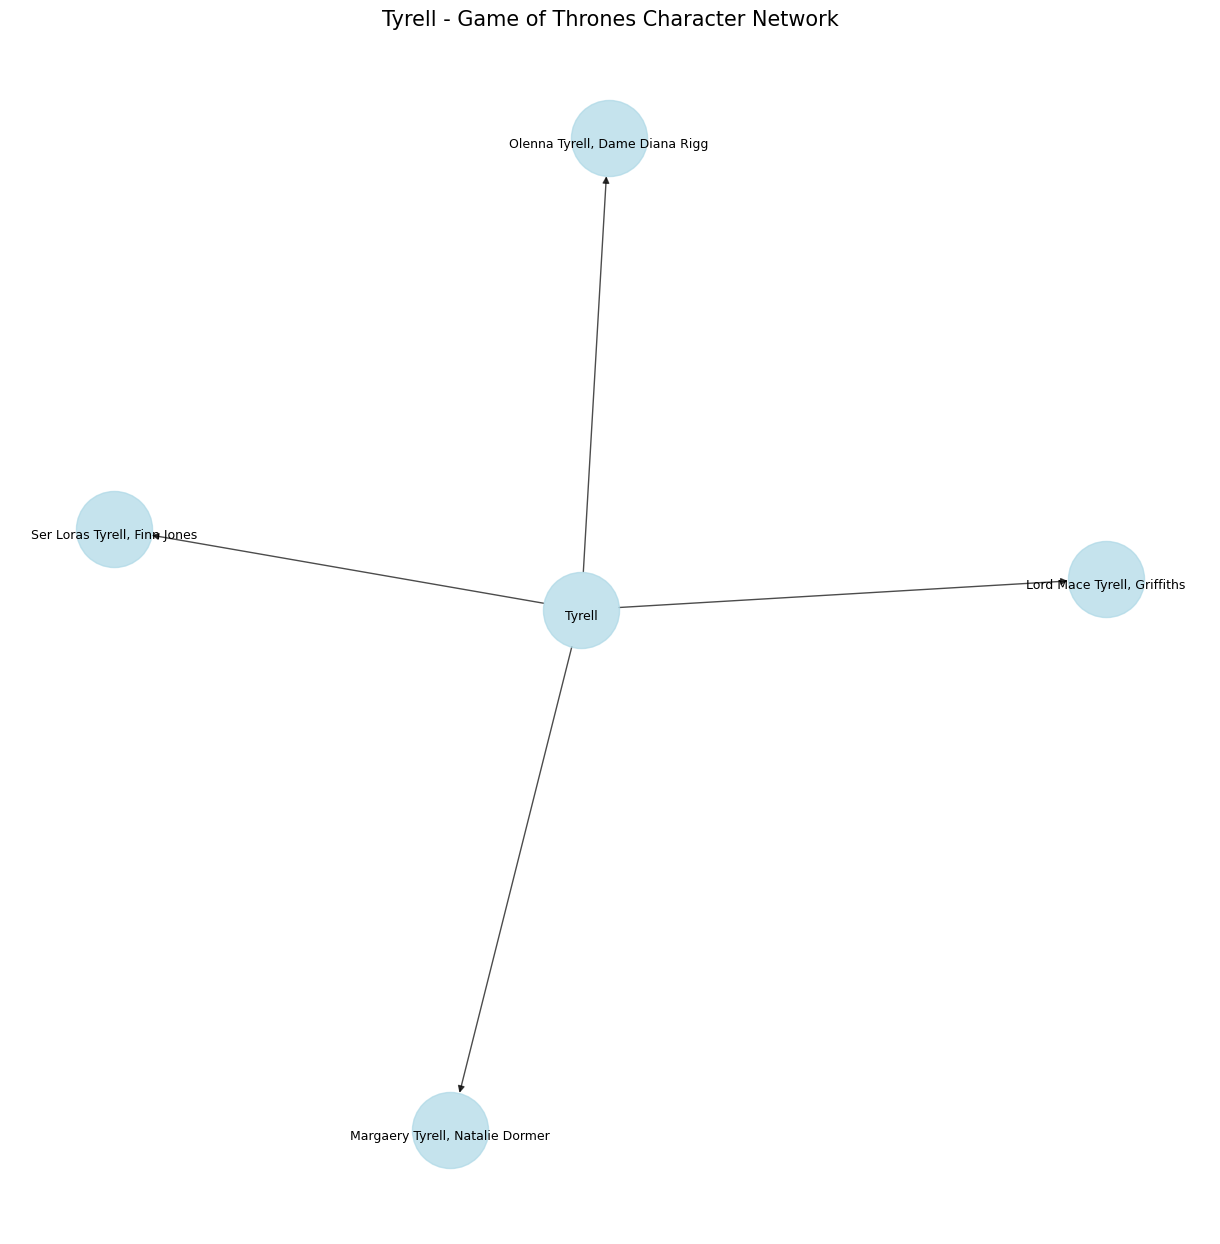

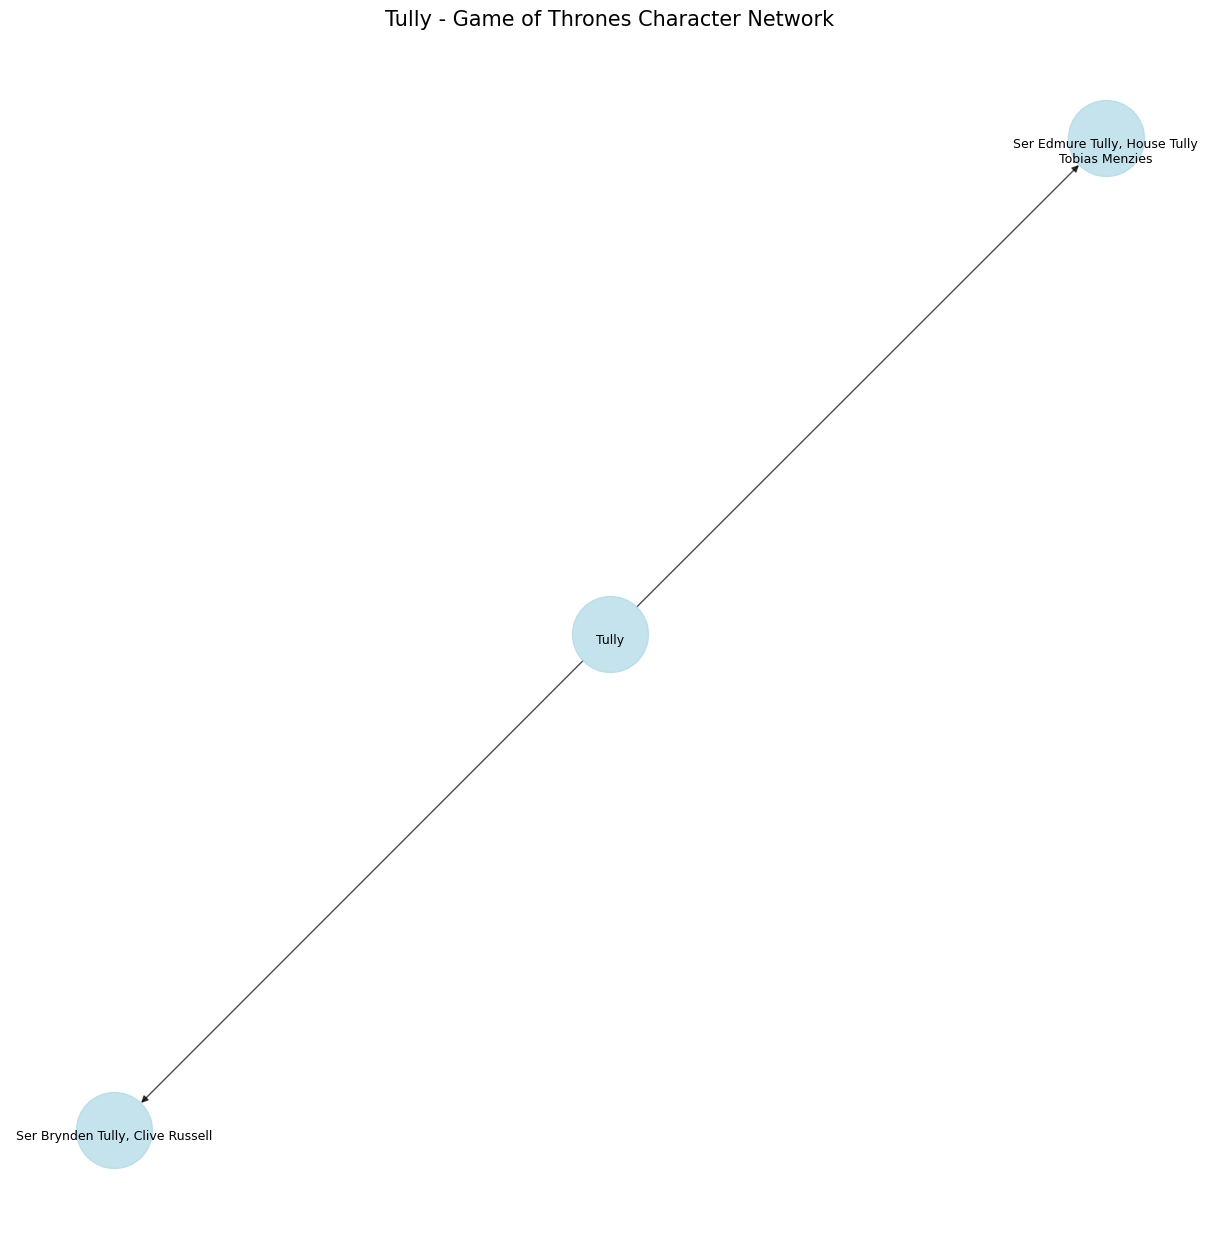

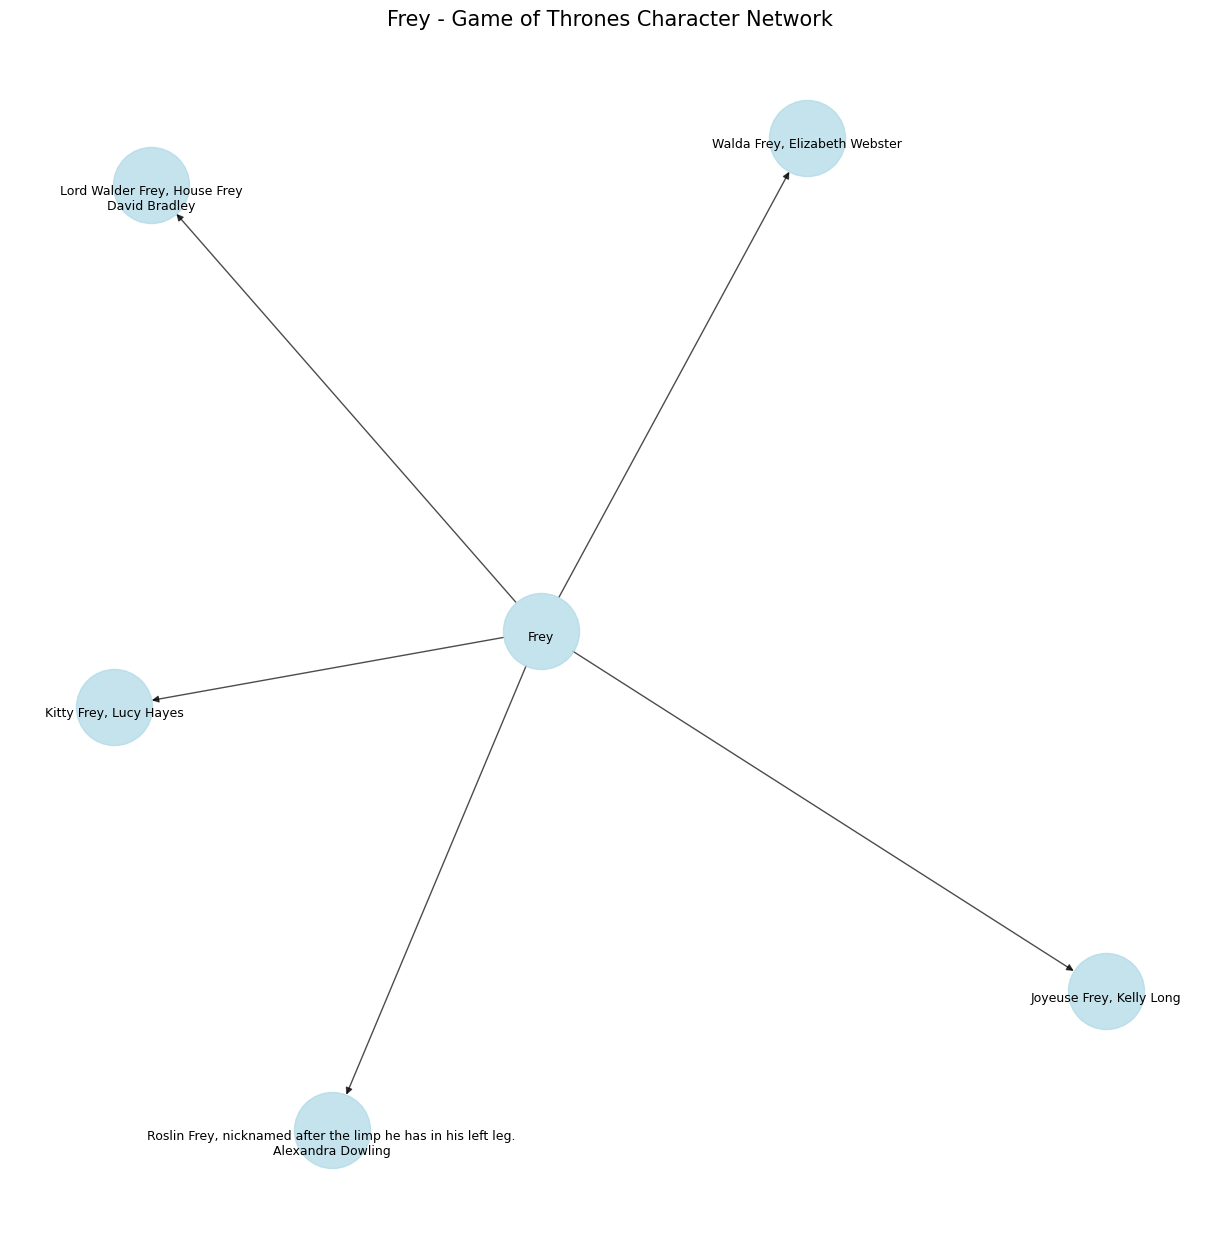

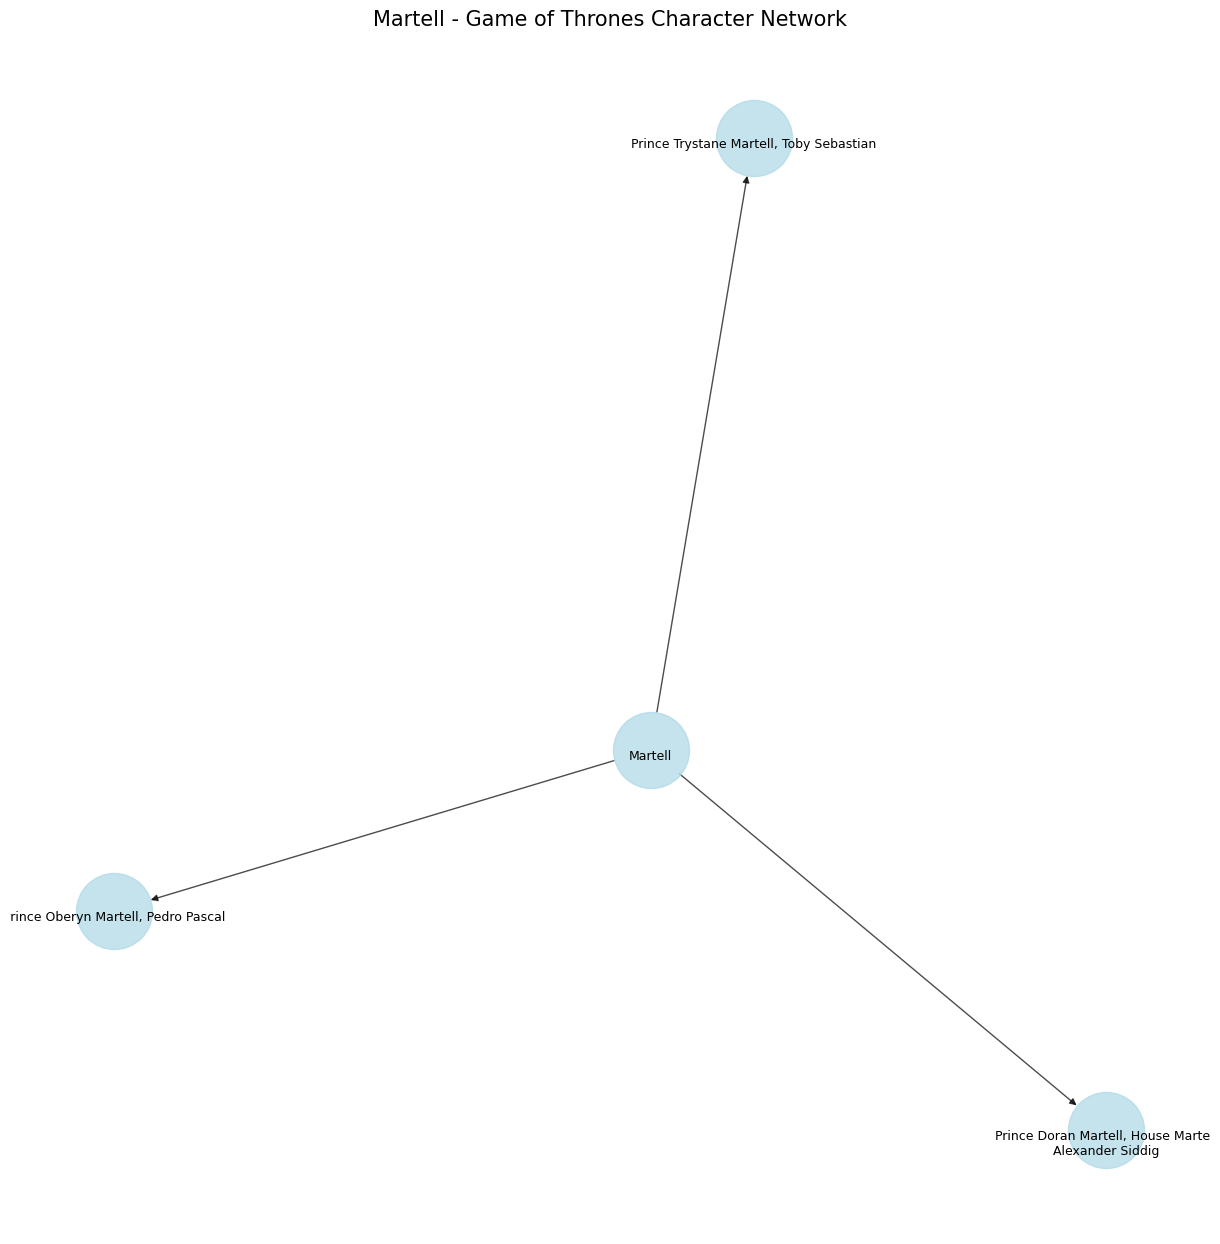

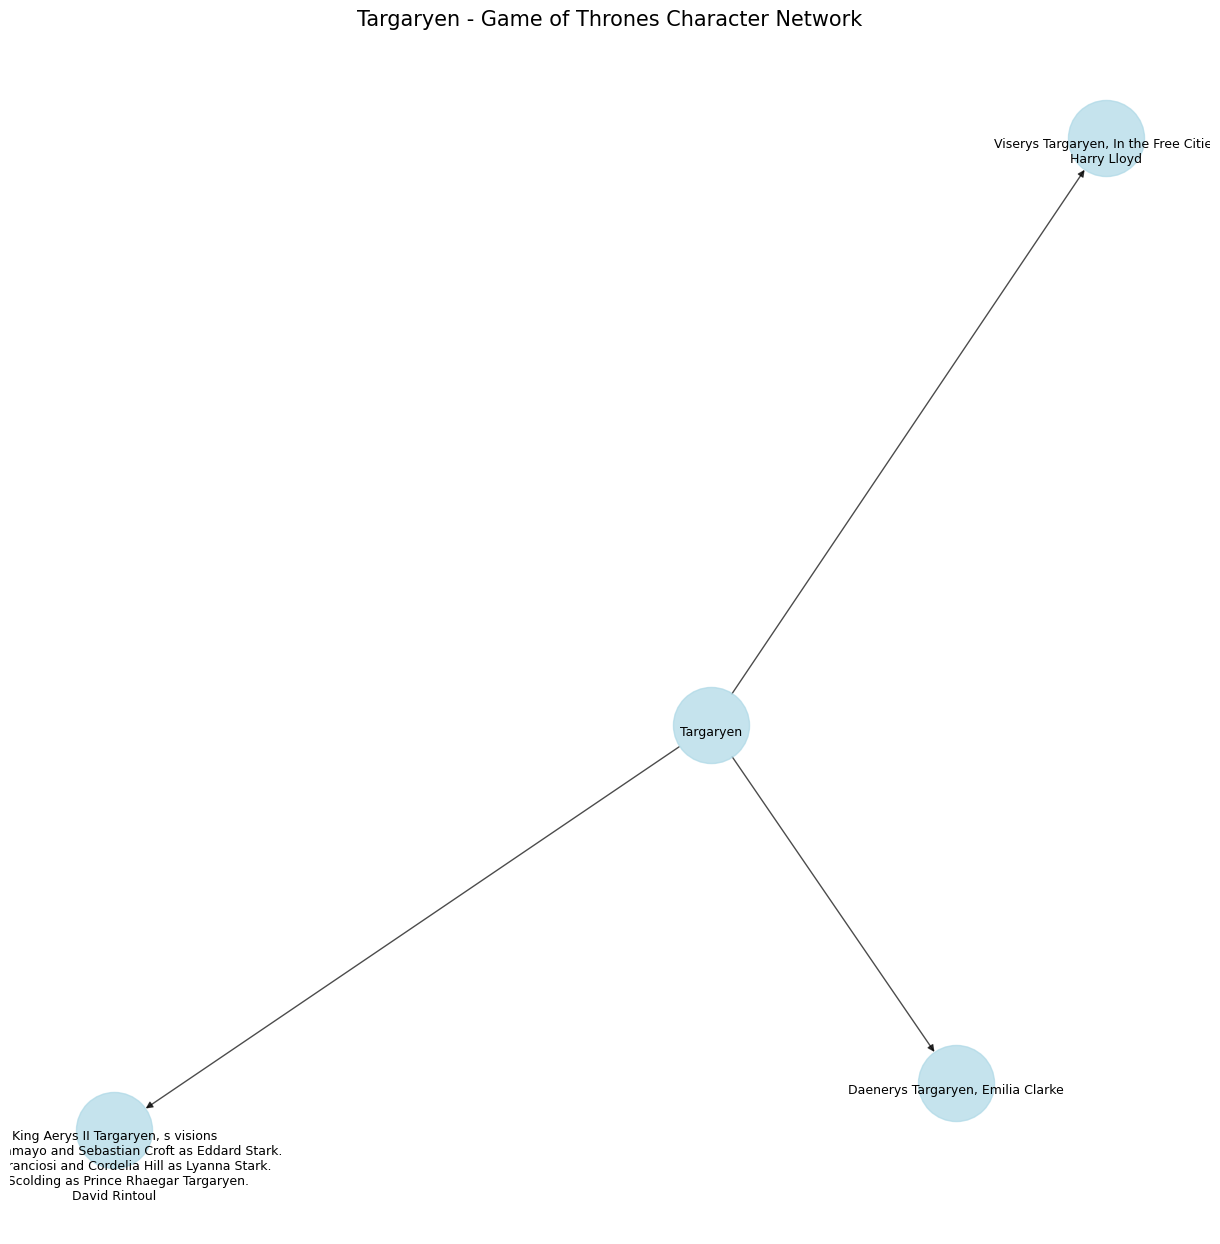

In [176]:
# Load the CSV file
csv_file = 'game_of_thrones_characters.csv'
df = pd.read_csv(csv_file)

# Get unique families from the DataFrame
families = df['Family'].unique()

# Iterate over each family to create separate graphs
for family in families:
    if family == "Unknown":  
        continue

    # Create a directed graph for this family
    G = nx.DiGraph()

    # Filter data for the current family
    family_data = df[df['Family'] == family]

    # Adding the nodes and edges for the current family's graph
    for _, row in family_data.iterrows():
        actor = row['Actor']
        character = row['Character']
        description = row['Description']

        # Add the character node with attributes
        G.add_node(character, actor=actor, description=description)

        # Add an edge from the family to the character
        G.add_node(family)  
        G.add_edge(family, character)

    # Draw the network for the current family
    pos = nx.spring_layout(G, k=0.3, iterations=50)  # Adjust k for spacing, iterations for stability
    plt.figure(figsize=(12, 12))
    nx.draw(G, pos, with_labels=False, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', alpha=0.7)

    # Adding labels in the format as "Character, Actor"
    node_labels = {node: f"{node}, {G.nodes[node]['actor']}" if 'actor' in G.nodes[node] else node for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9, verticalalignment='top')

    # Set the title and display the graph
    plt.title(f'{family} - Game of Thrones Character Network', fontsize=15)
    plt.show()
